In [327]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [328]:
!kaggle datasets download -d imakash3011/online-shoppers-purchasing-intention-dataset

Dataset URL: https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset
License(s): other
online-shoppers-purchasing-intention-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [329]:
import zipfile
zip_ref = zipfile.ZipFile('/content/online-shoppers-purchasing-intention-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
from IPython.display import display, HTML

In [331]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

In [332]:
pd.set_option('display.max_columns', None)

In [333]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

# **Data Exploration**

In [334]:
df.shape

(12330, 18)

In [335]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Converting columns with Categorical values from numeric to String

In [337]:
cols =['Weekend','Revenue','Region','SpecialDay','OperatingSystems','Browser','TrafficType',"SpecialDay"]
def convert(col):
  df[col] = df[col].astype('str')

for i in cols:
  convert(i)

In [338]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']

In [339]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues  
count  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258  
std        0.048488      0.048597     18.568437  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000  
50%        0.003112      0.025156      0.000000  
75%        0.016813      0.050000      0.000000  
max        0.200000      0.200000    361.763742

# **Exploratory Data Analysis**

# Pair plot of numerical columns

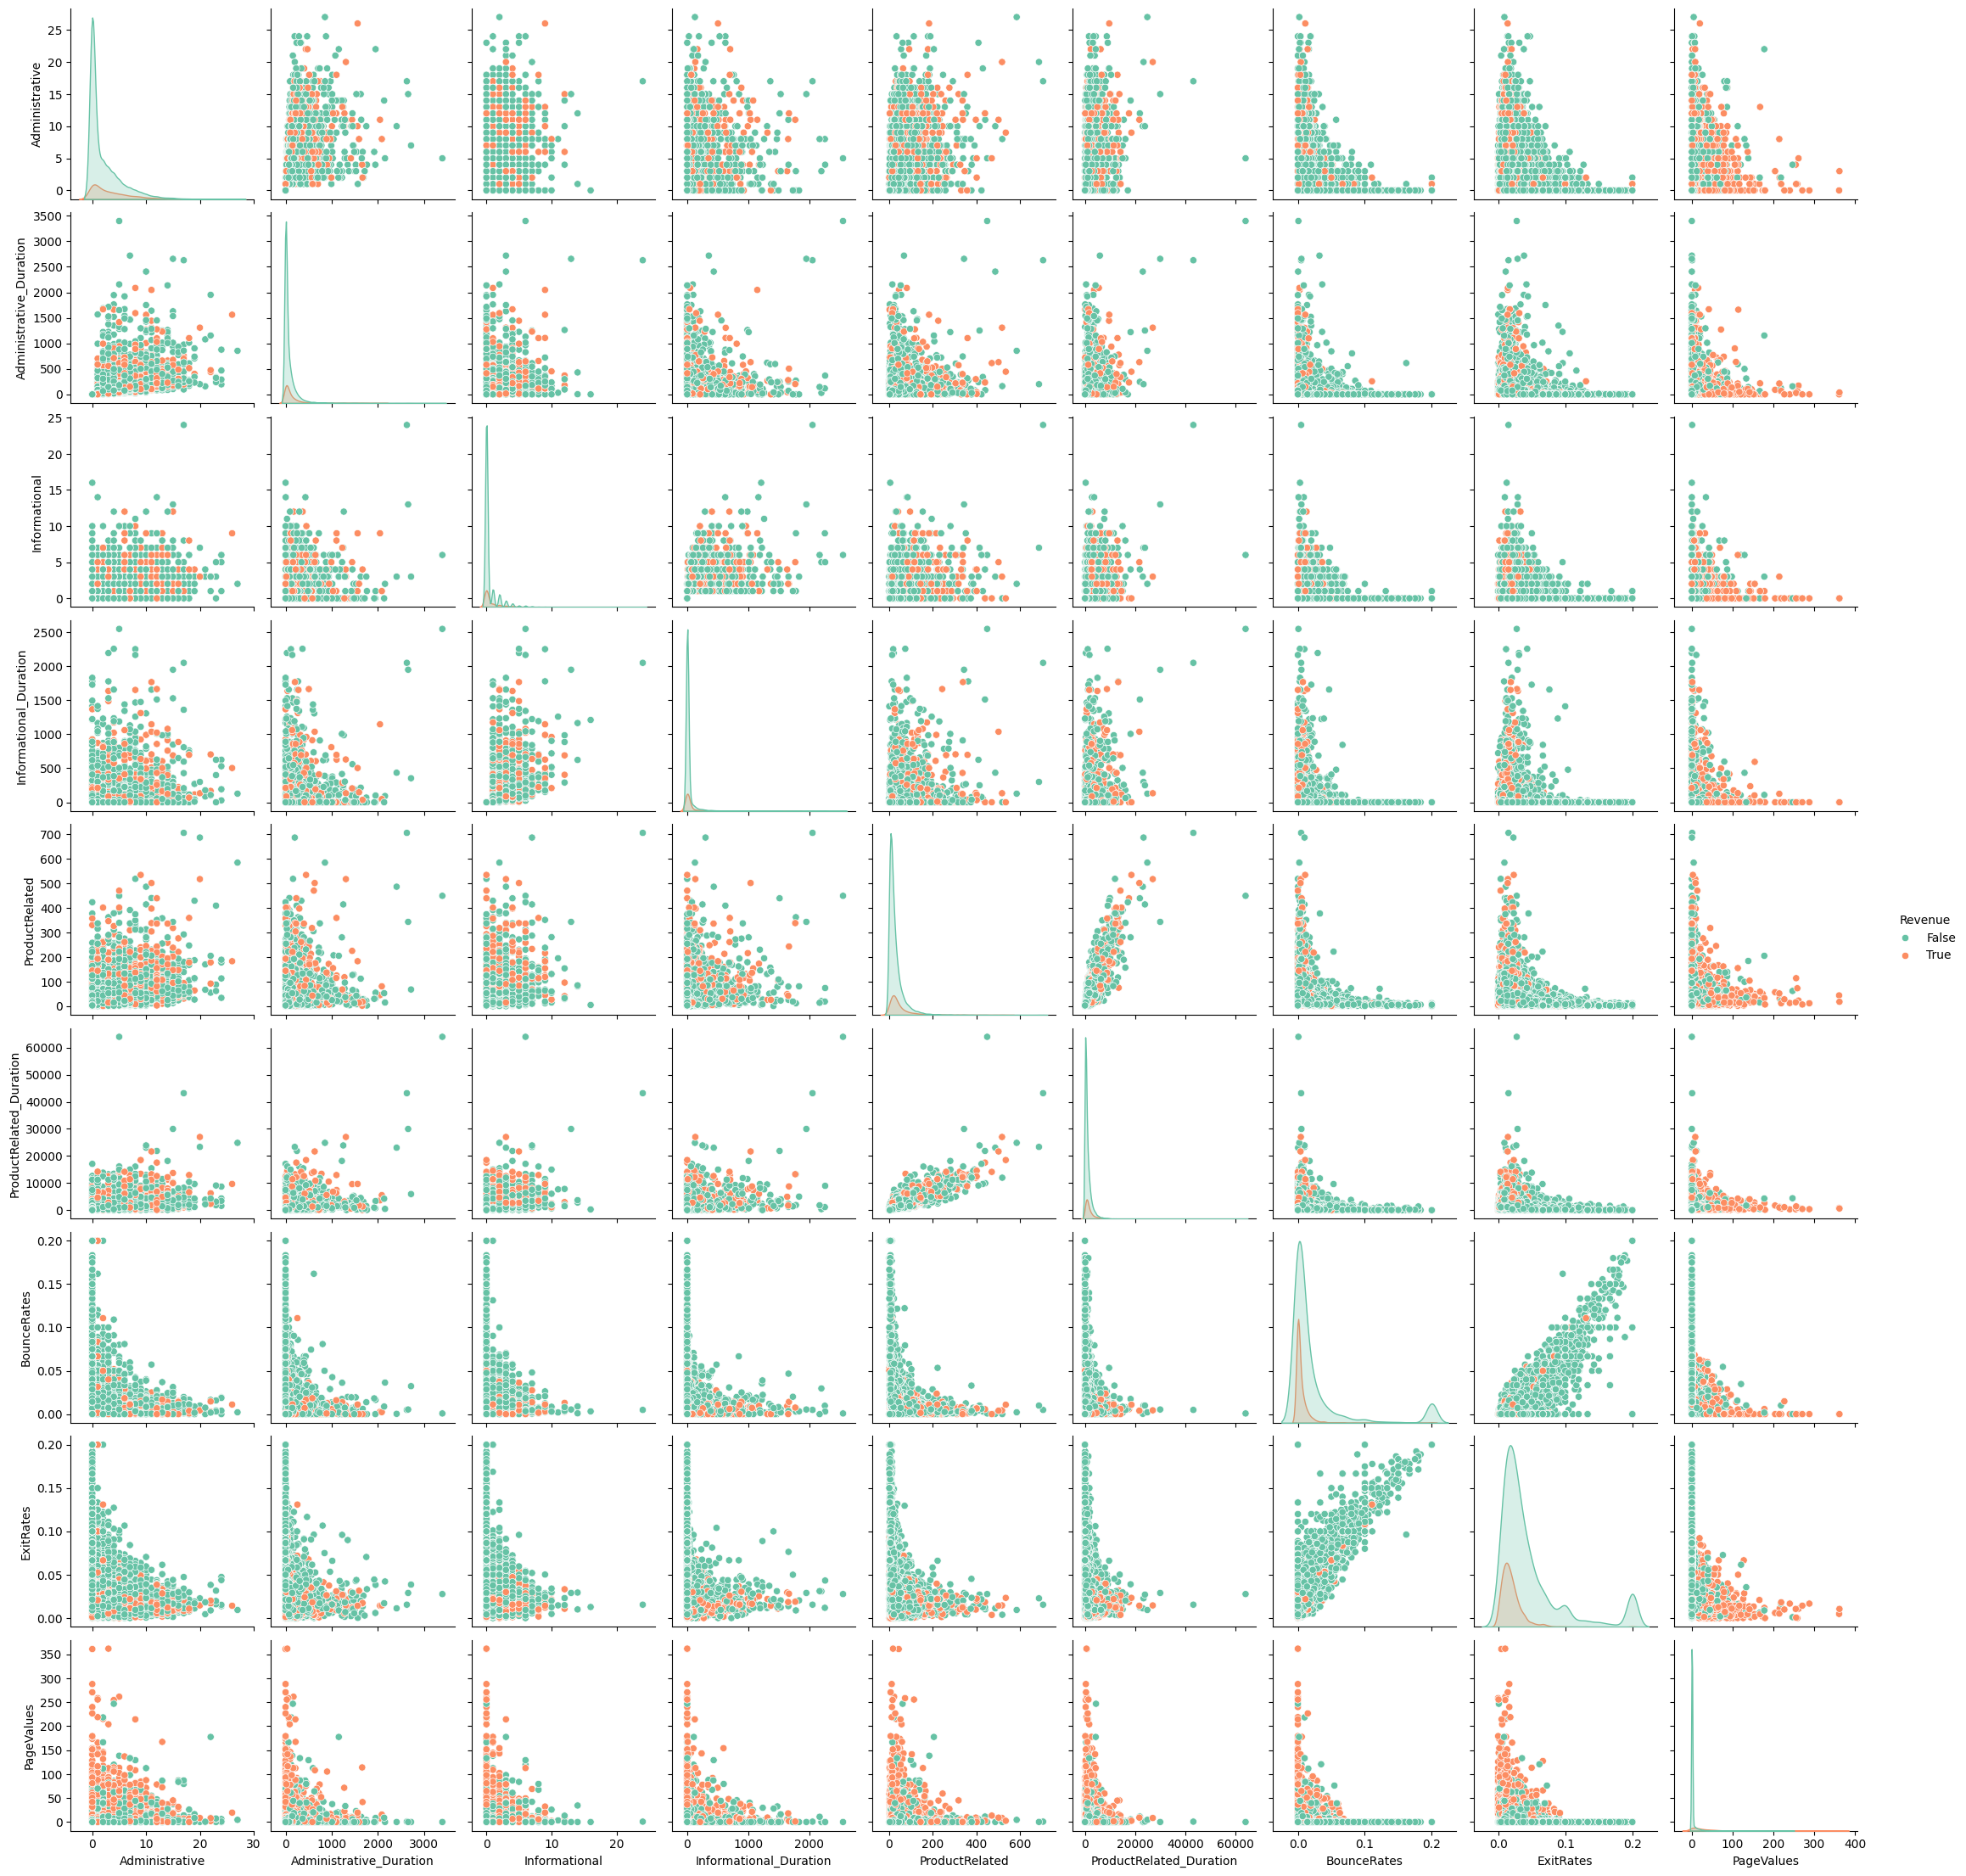

In [340]:
sns.pairplot(df, palette="Set2", hue="Revenue")
plt.show()

In [341]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# **Categorical Feature Value Counts Compared Across Other Categorical Features Using Stacked Bar Plot**

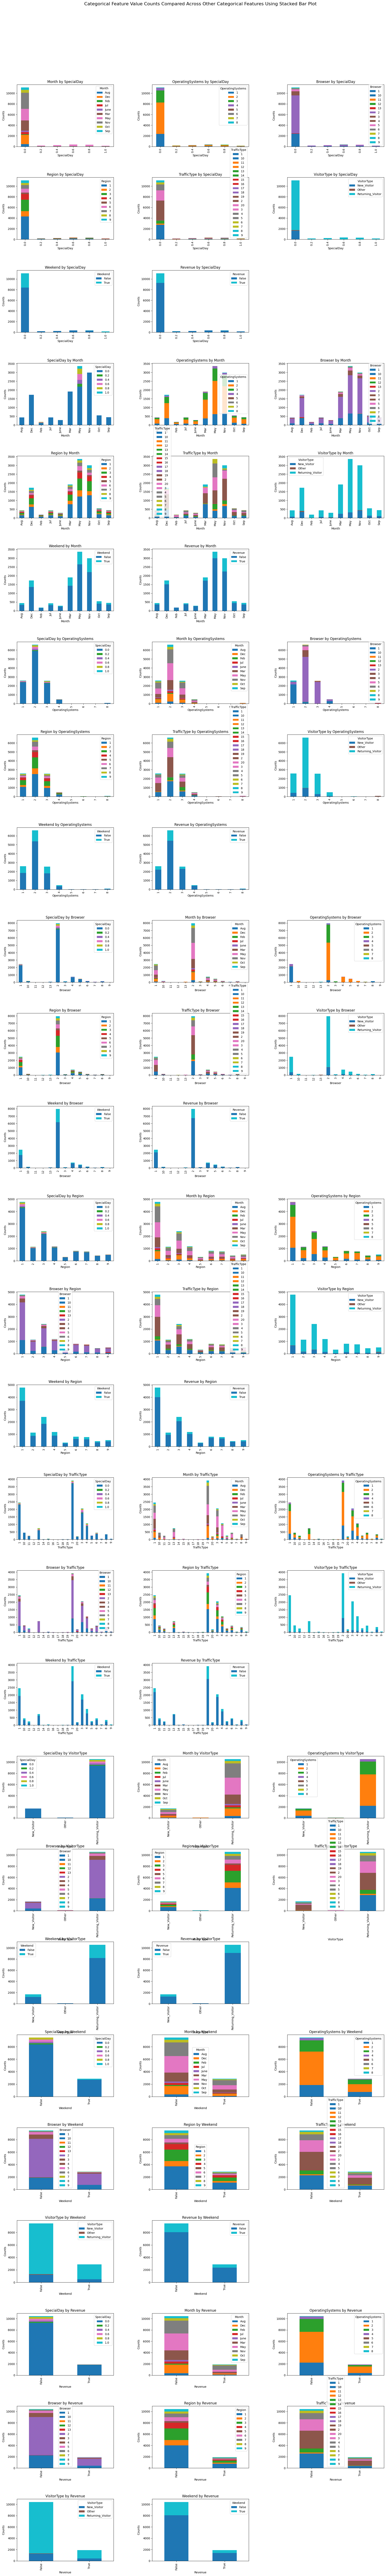

In [342]:
def RELATION_COL(col1, col2, ax):
    value_counts = df.groupby(col1)[col2].value_counts().unstack().fillna(0)
    colors = plt.cm.tab10(np.linspace(0, 1, value_counts.shape[1]))
    value_counts.plot(kind="bar", stacked=True, ax=ax, color=colors)
    ax.set_title(f'{col2} by {col1}')
    ax.set_ylabel('Counts')
    ax.set_xlabel(col1)

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

ncols = 3

total_plots = sum([(len(cat_cols) - 1 + 1) for _ in cat_cols])

nrows = (total_plots // ncols) + (total_plots % ncols > 0)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
ax = ax.flatten()
plot_idx = 0

for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if col1 != col2:
            if plot_idx < len(ax):
                RELATION_COL(col1, col2, ax[plot_idx])
                plot_idx += 1

    if plot_idx < len(ax):
        ax[plot_idx].axis('off')
        plot_idx += 1


for k in range(plot_idx, len(ax)):
    ax[k].axis('off')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.5, wspace=0.4)
fig.suptitle('Categorical Feature Value Counts Compared Across Other Categorical Features Using Stacked Bar Plot', fontsize=16)

plt.show()


# **Mean Values of Numerical Features Compared Across Categorical Features**

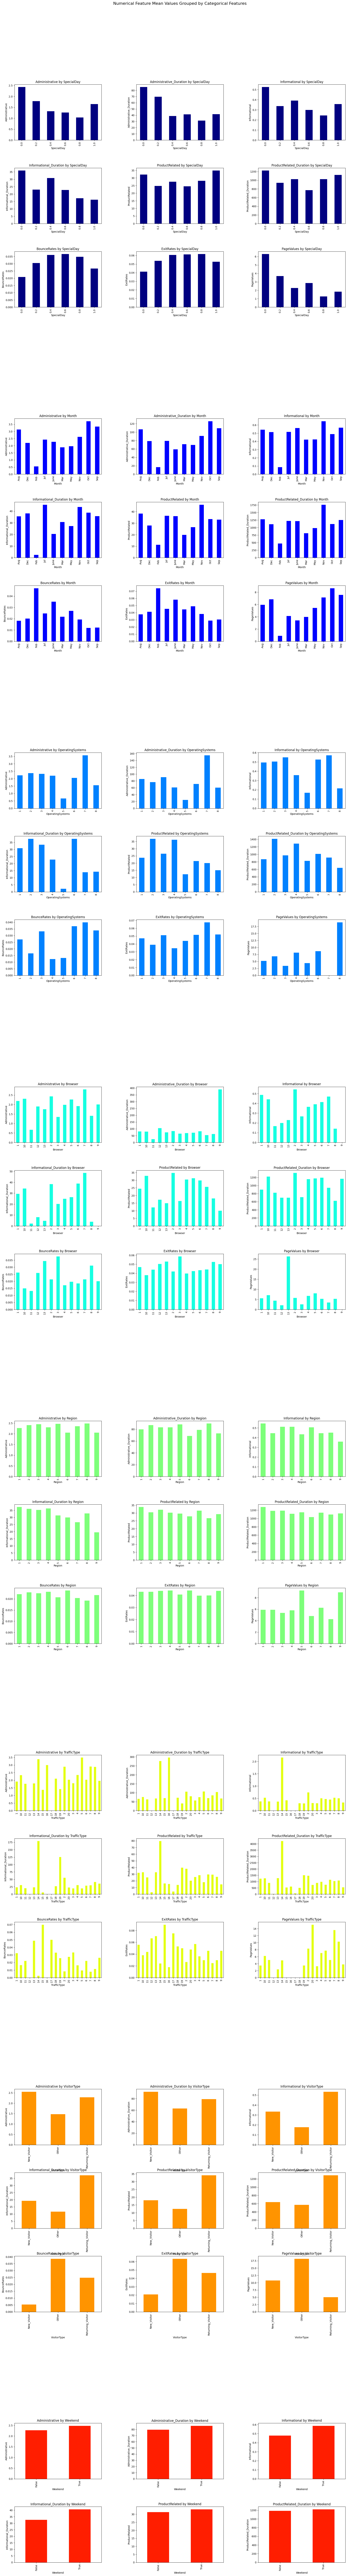

In [343]:
def NUM_COL(col1, col2, ax, color):
    df.groupby(col1)[col2].mean().plot(kind="bar", ax=ax, color=color)
    ax.set_title(f'{col2} by {col1}')
    ax.set_ylabel(col2)
    ax.set_xlabel(col1)

ncols = 3
nrows = (len(cat_cols) * (len(num_cols) + 1)) // ncols
colors = plt.cm.jet(np.linspace(0, 1, len(cat_cols)))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
ax = ax.flatten()
plot_idx = 0

for col_idx, col1 in enumerate(cat_cols):
    for num_idx, col2 in enumerate(num_cols):
        if plot_idx < len(ax):
            NUM_COL(col1, col2, ax[plot_idx], colors[col_idx])
            plot_idx += 1
    if plot_idx + ncols <= len(ax):
        for _ in range(ncols):
            ax[plot_idx].axis('off')
            plot_idx += 1

for extra_ax in ax[plot_idx:]:
    extra_ax.axis('off')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.5, wspace=0.4)
fig.suptitle('Numerical Feature Mean Values Grouped by Categorical Features', fontsize=16)

plt.show()


# **Histogram of categorical columns**

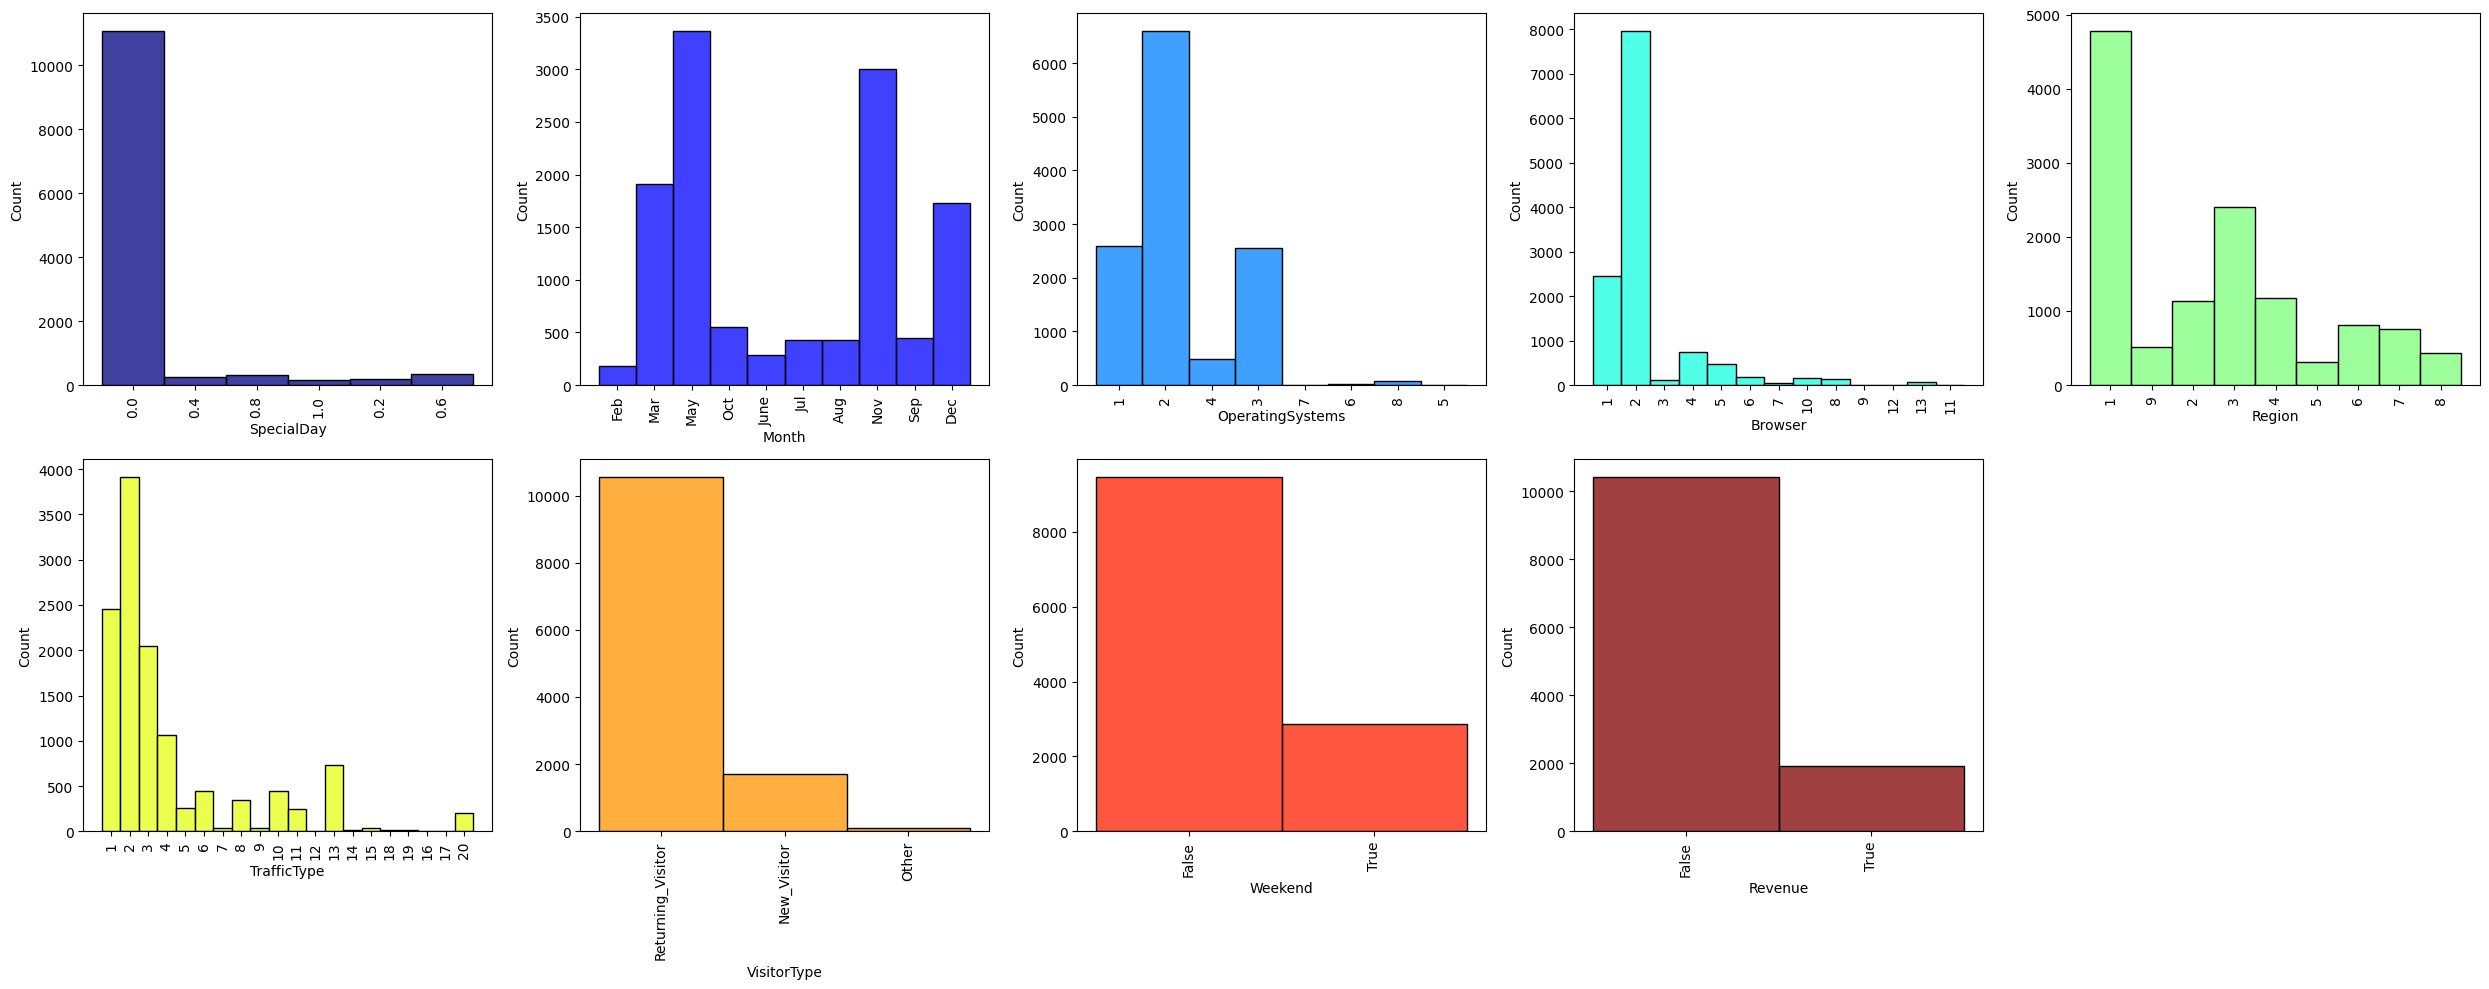

In [344]:
colors = plt.cm.jet(np.linspace(0, 1, len(num_cols)))

ncols= 5
nrows = int(np.ceil(len(cat_cols) / ncols))


fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25 ,5 * nrows))
axs.flatten()

axs = axs.flatten()

for idx, col in enumerate(cat_cols):
    sns.histplot(df[col], color=colors[idx], ax=axs[idx])
    axs[idx].tick_params(axis='x', rotation=90)


for ax in axs[len(cat_cols):]:
    ax.set_visible(False)


plt.tight_layout()
plt.show()

# **Histogram of numeric columns**

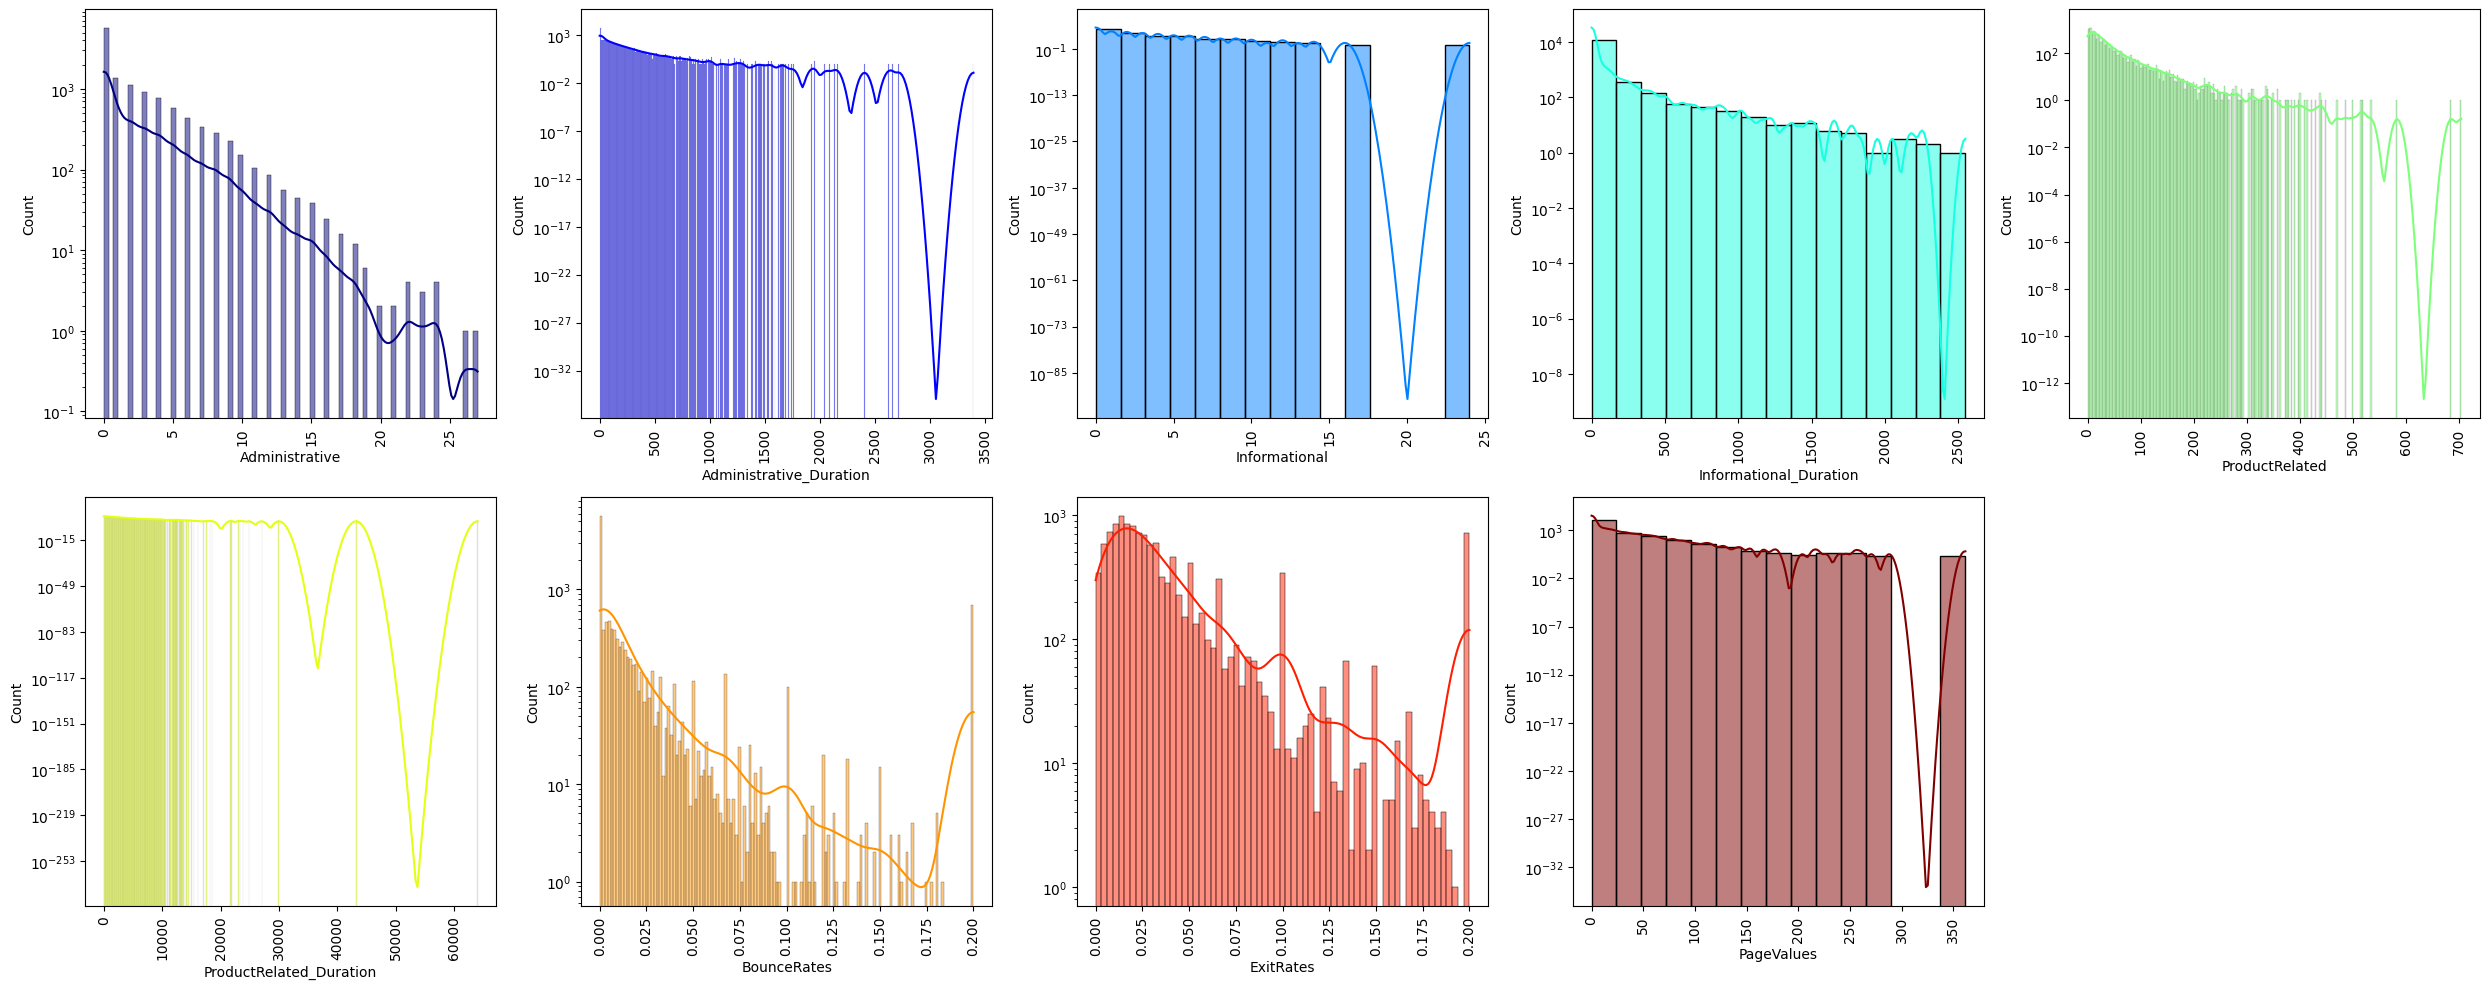

In [345]:
colors = plt.cm.jet(np.linspace(0, 1, len(num_cols)))

ncols= 5
nrows = int(np.ceil(len(num_cols) / ncols))


fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25 ,5 * nrows))
axs.flatten()
axs = axs.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(df[col], color=colors[idx], ax=axs[idx],kde=True,log=True)
    axs[idx].tick_params(axis='x', rotation=90)


for ax in axs[len(num_cols):]:
    ax.set_visible(False)


plt.tight_layout()
plt.show()

# **Comparison of Mean Values for Numerical Features by Revenue Category**

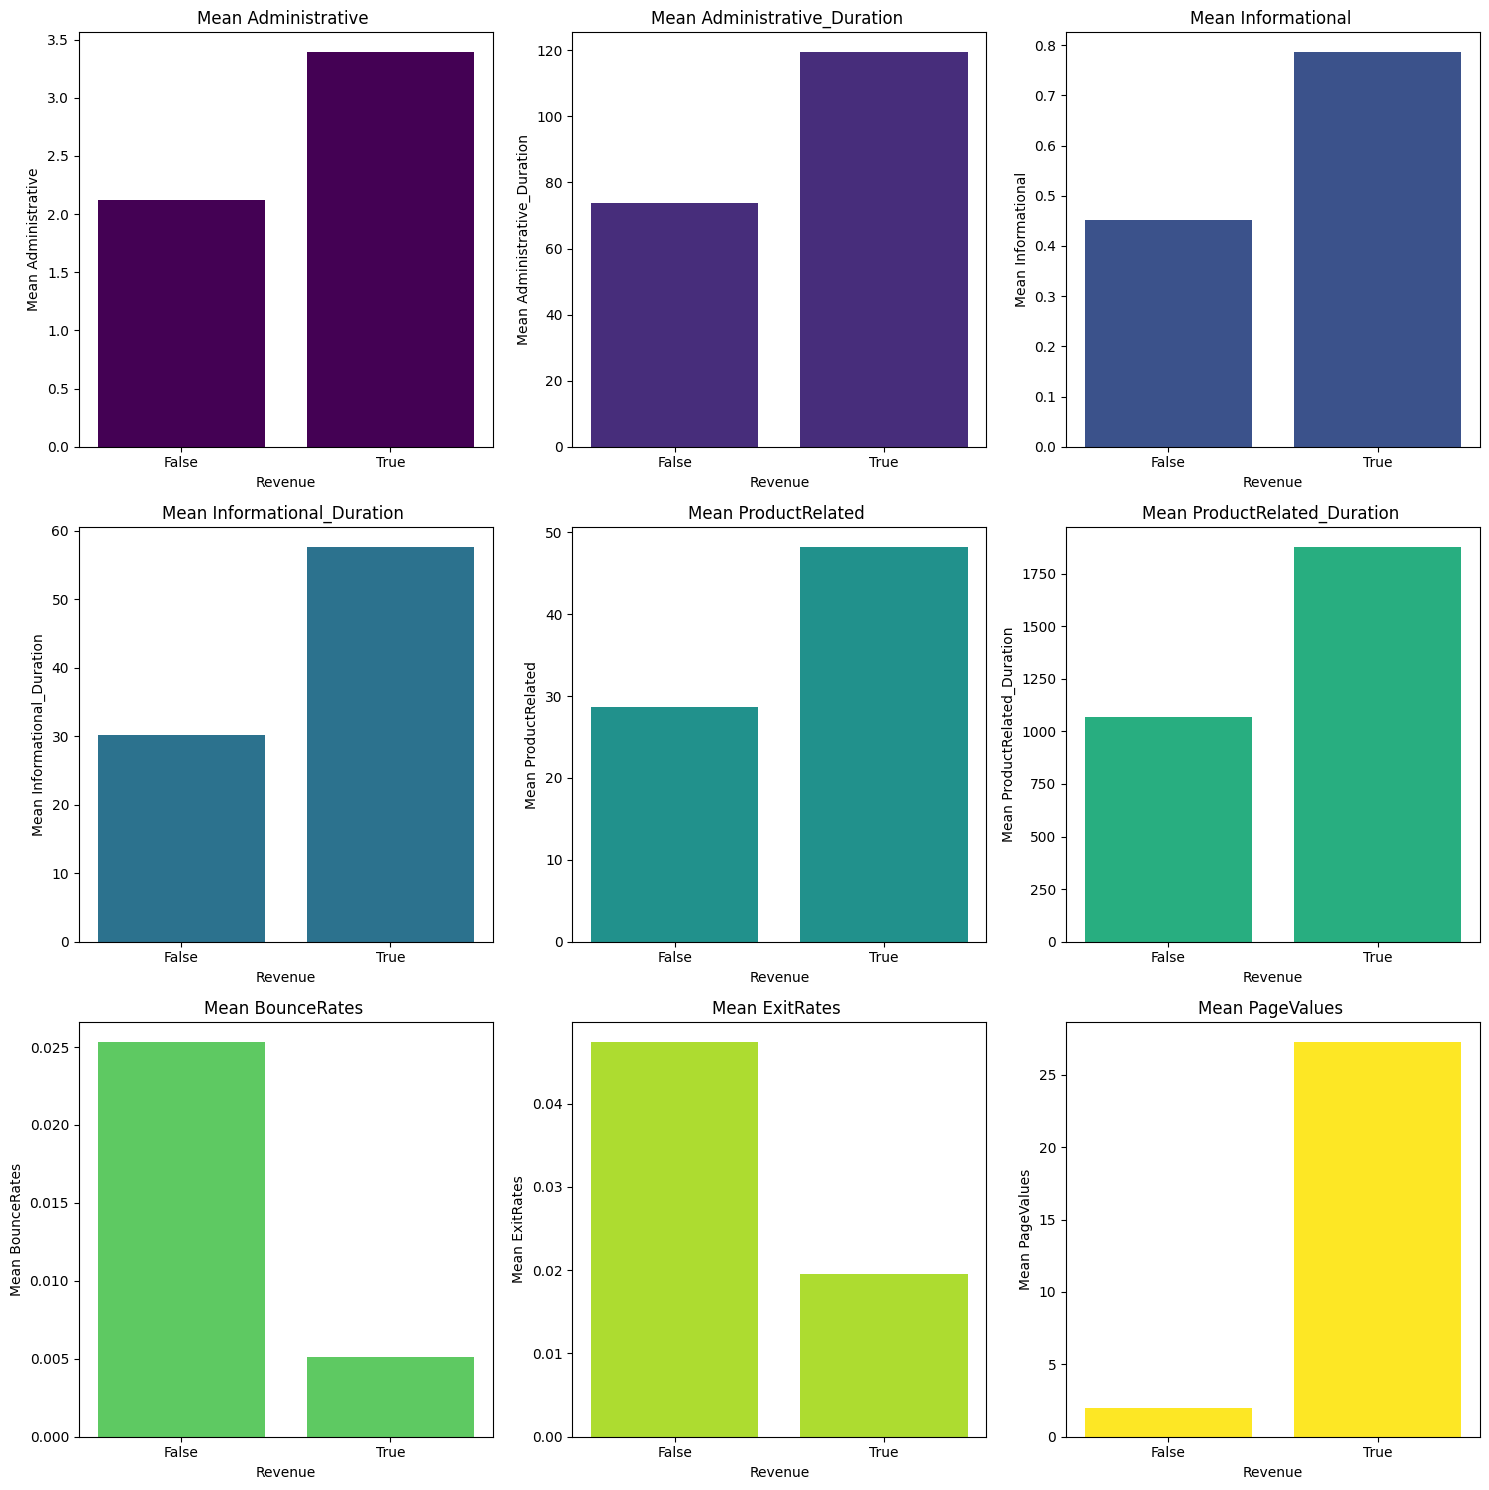

In [346]:
def numeric_charts(col, ax, color):

    a = df.groupby("Revenue")[col].mean()


    ax.bar(x=a.index, height=a.values, color=color)

    ax.set_xlabel("Revenue")
    ax.set_ylabel(f"Mean {col}")
    ax.set_title(f"Mean {col} ")


num_cols = df.select_dtypes(include=np.number).columns
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))
colors = plt.cm.viridis(np.linspace(0, 1, len(num_cols)))


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
ax = ax.flatten()


for idx, col in enumerate(num_cols):
    numeric_charts(col, ax[idx], colors[idx])

for j in range(len(num_cols), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


# **Target column Value Counts Compared Across Other Categorical Features Using Pie Plot**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


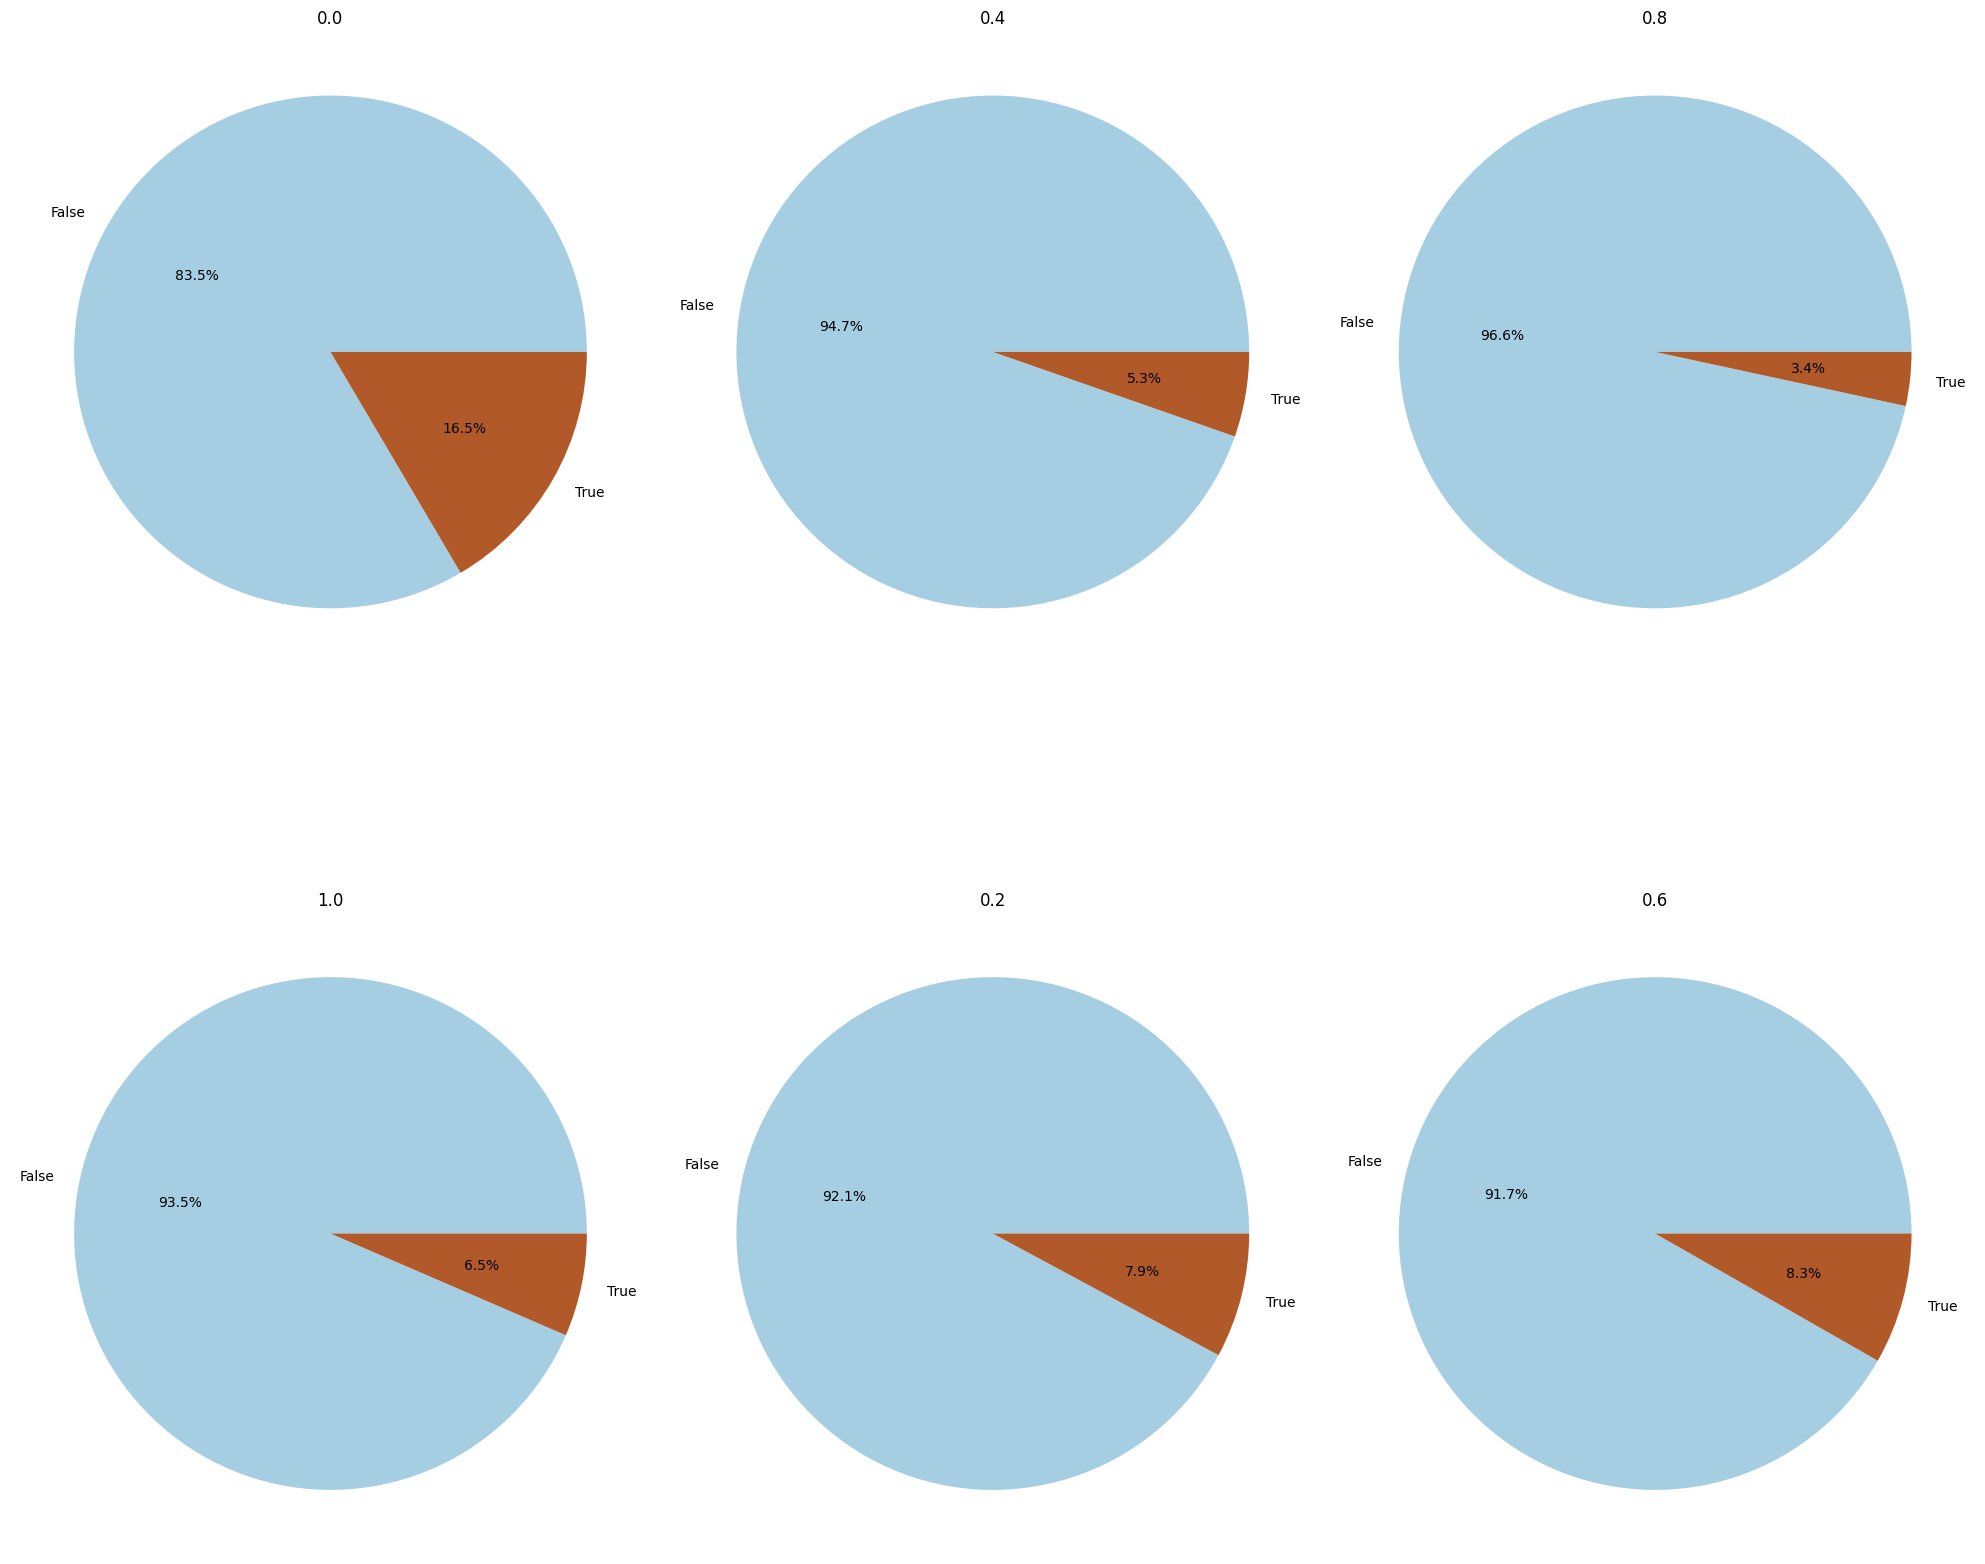

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


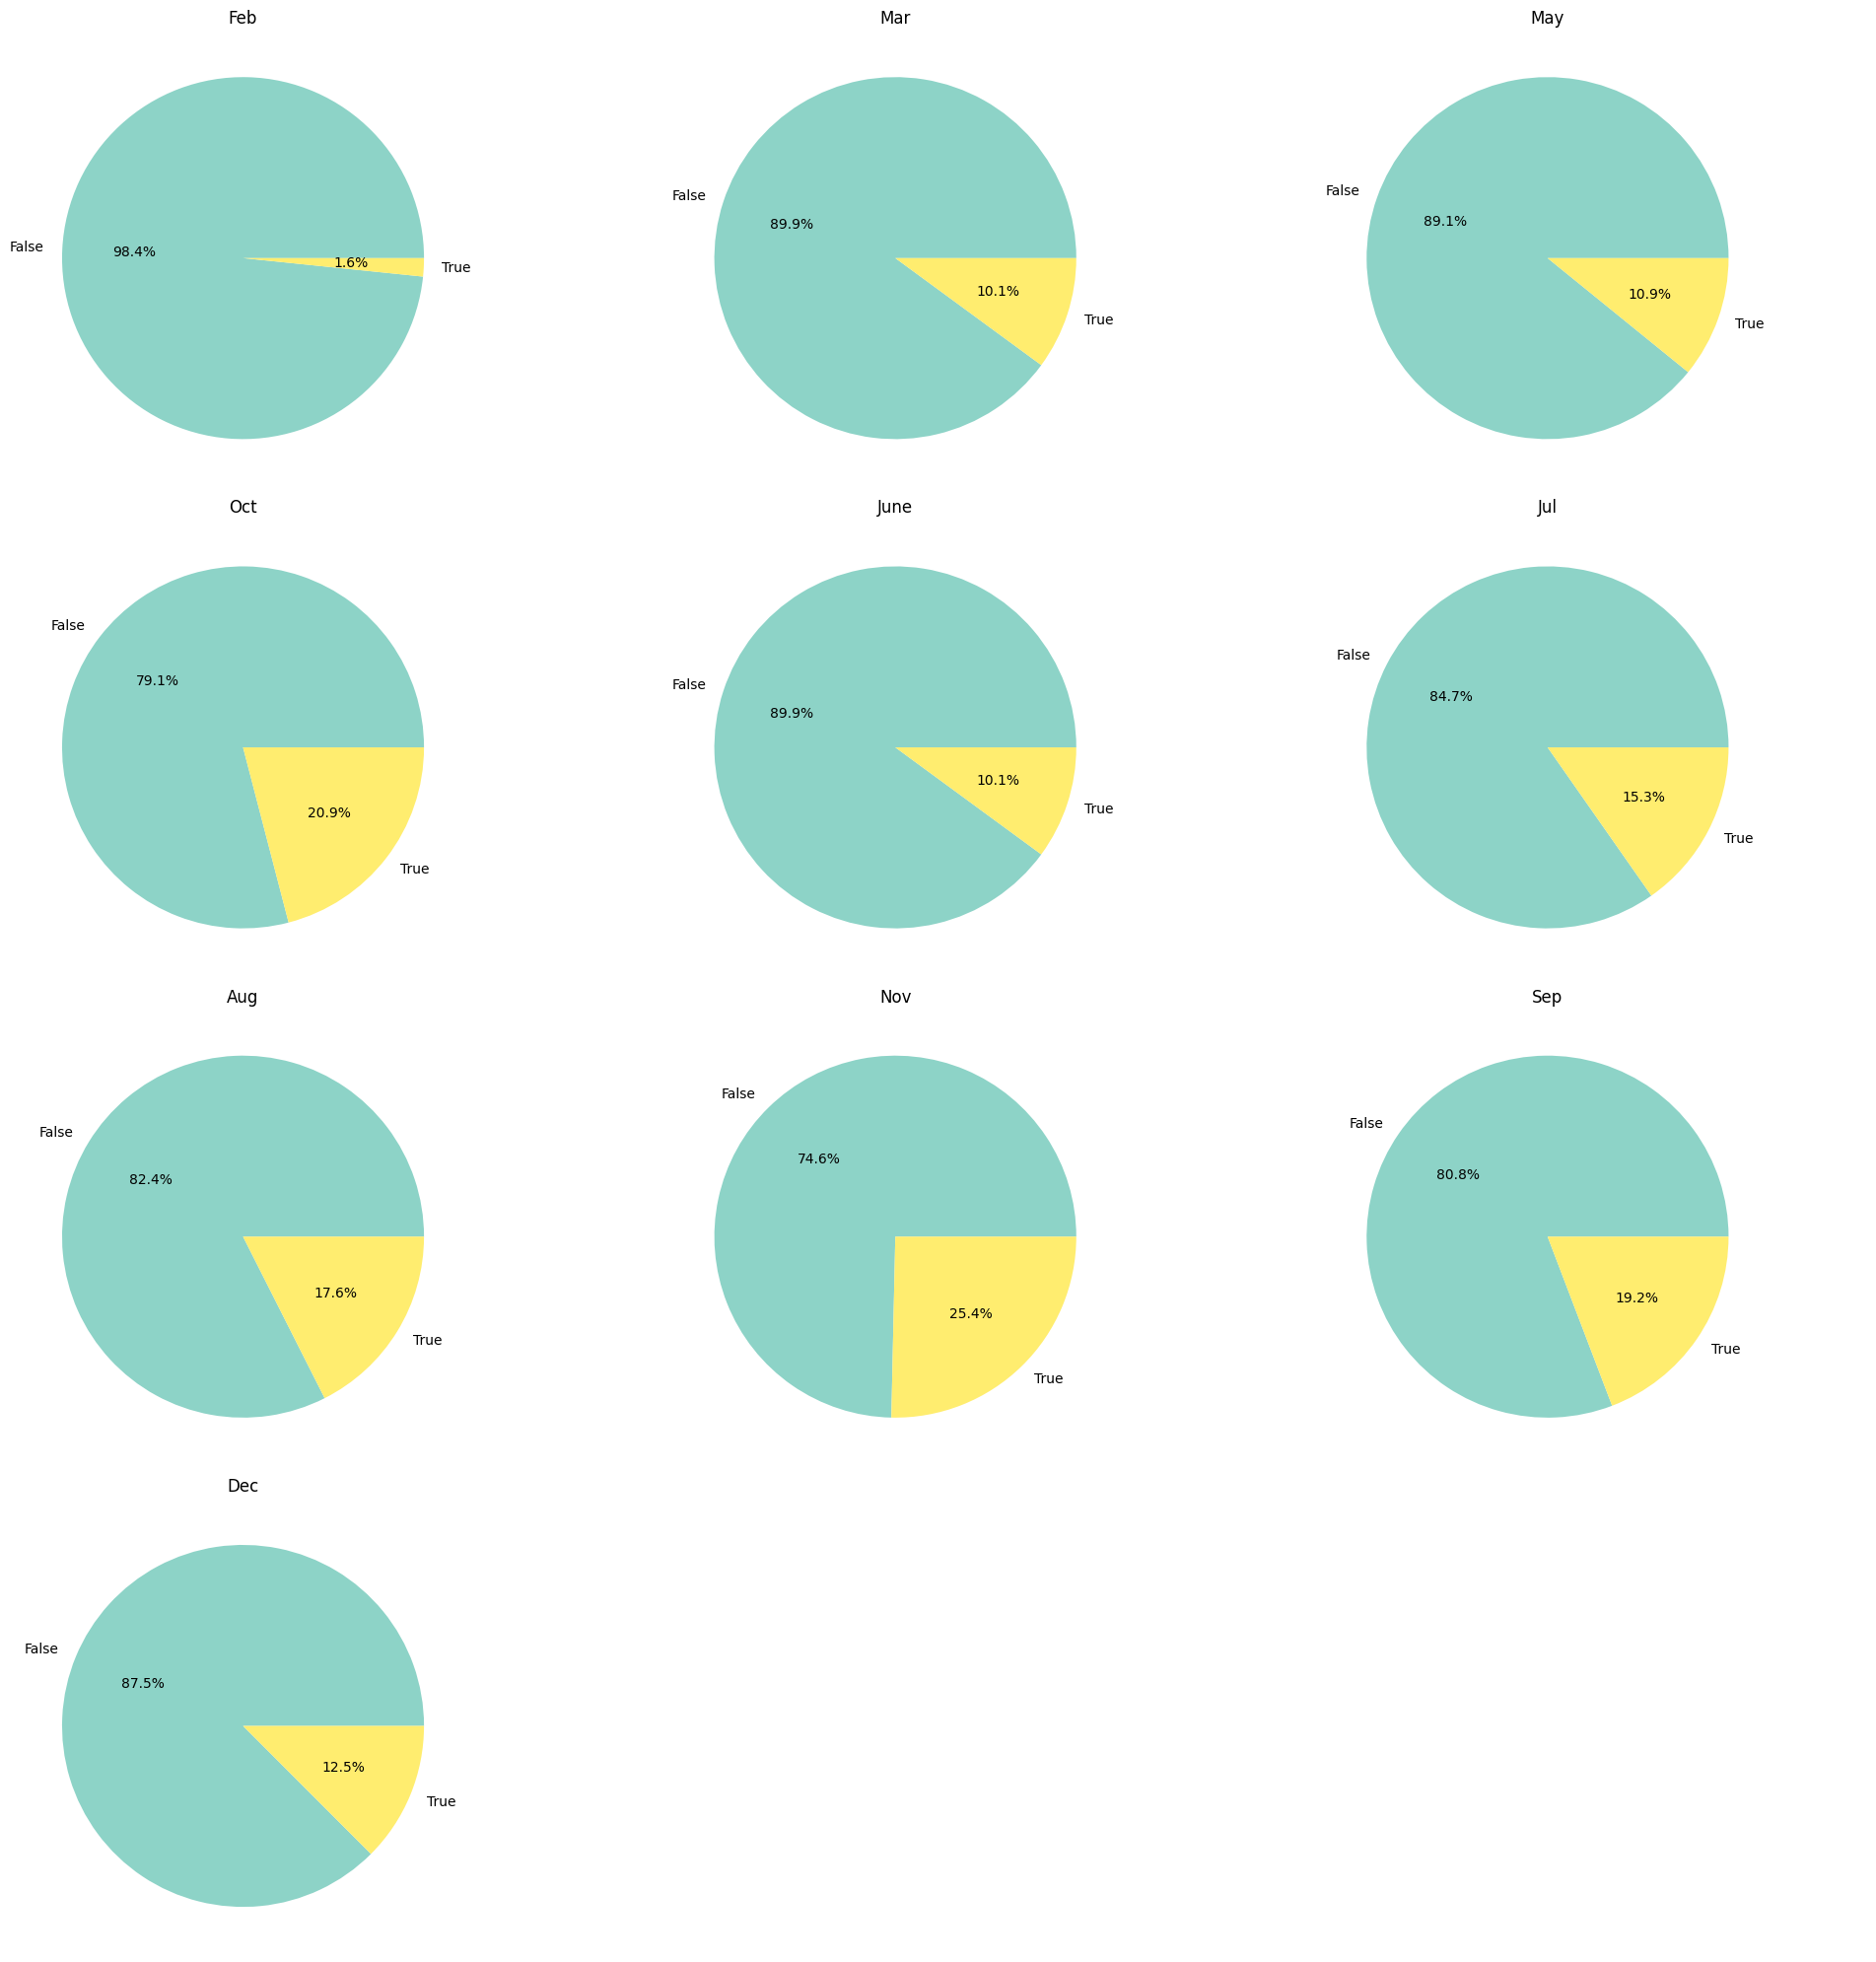

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


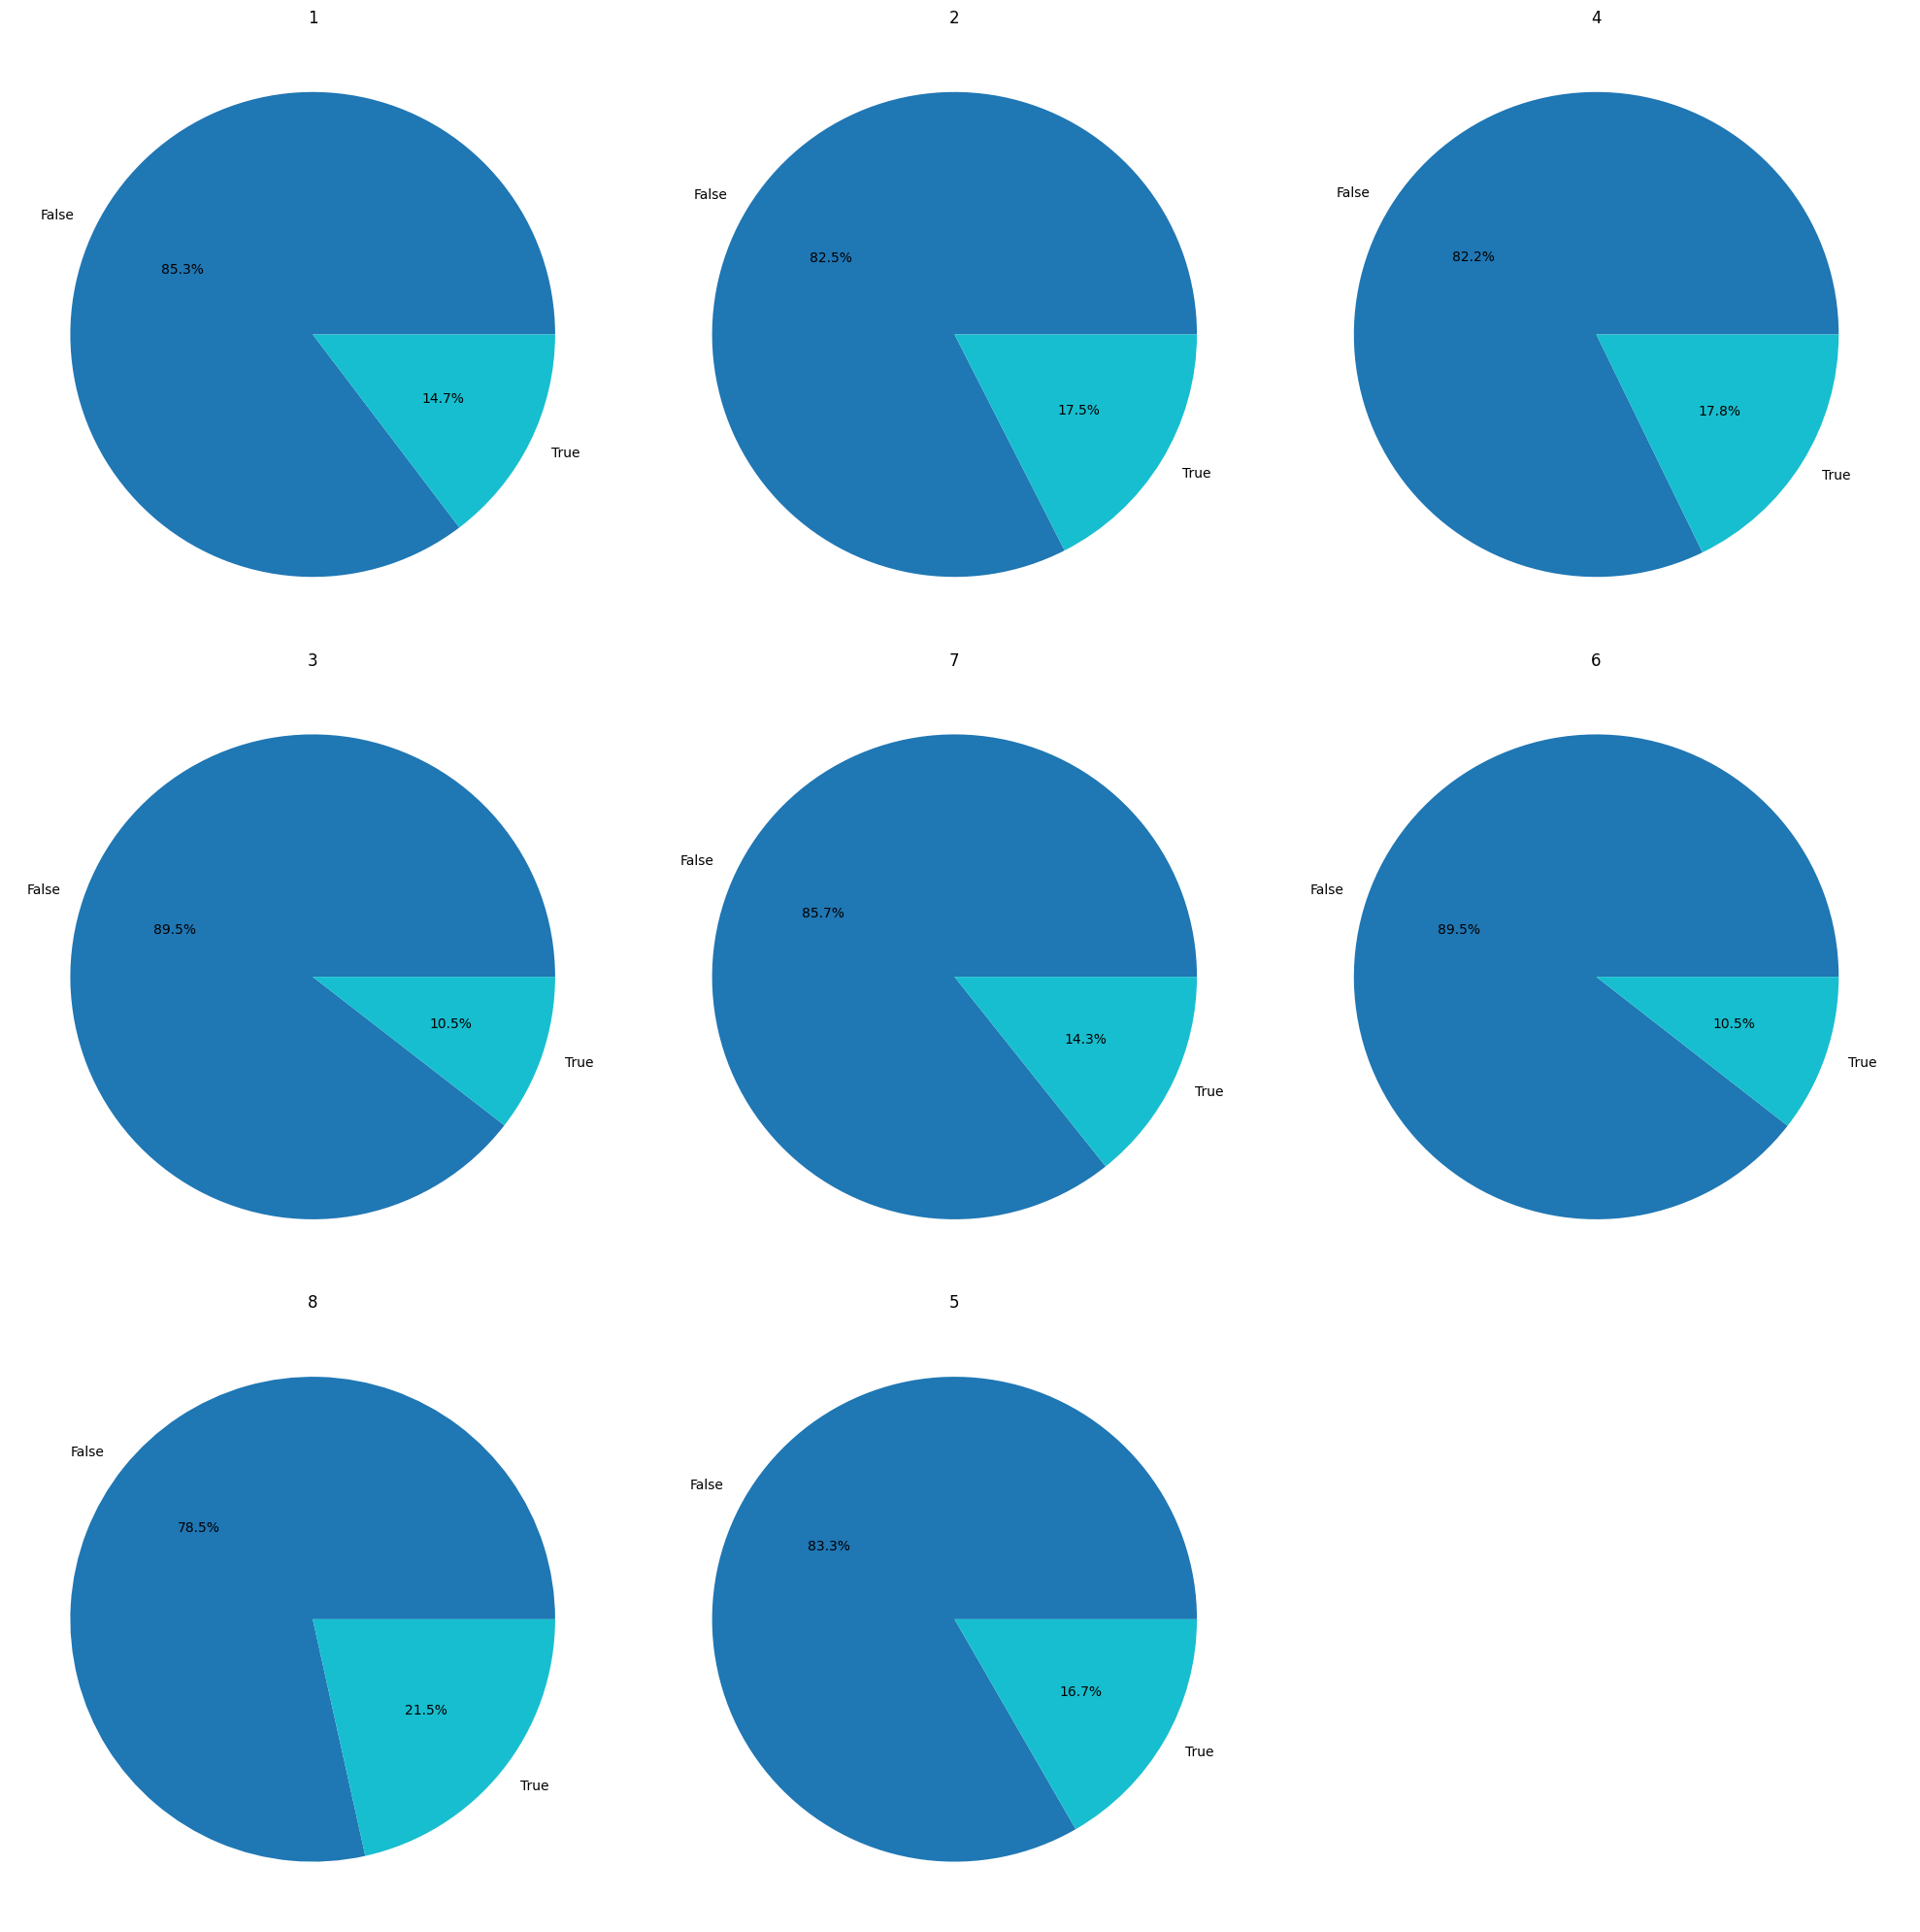

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


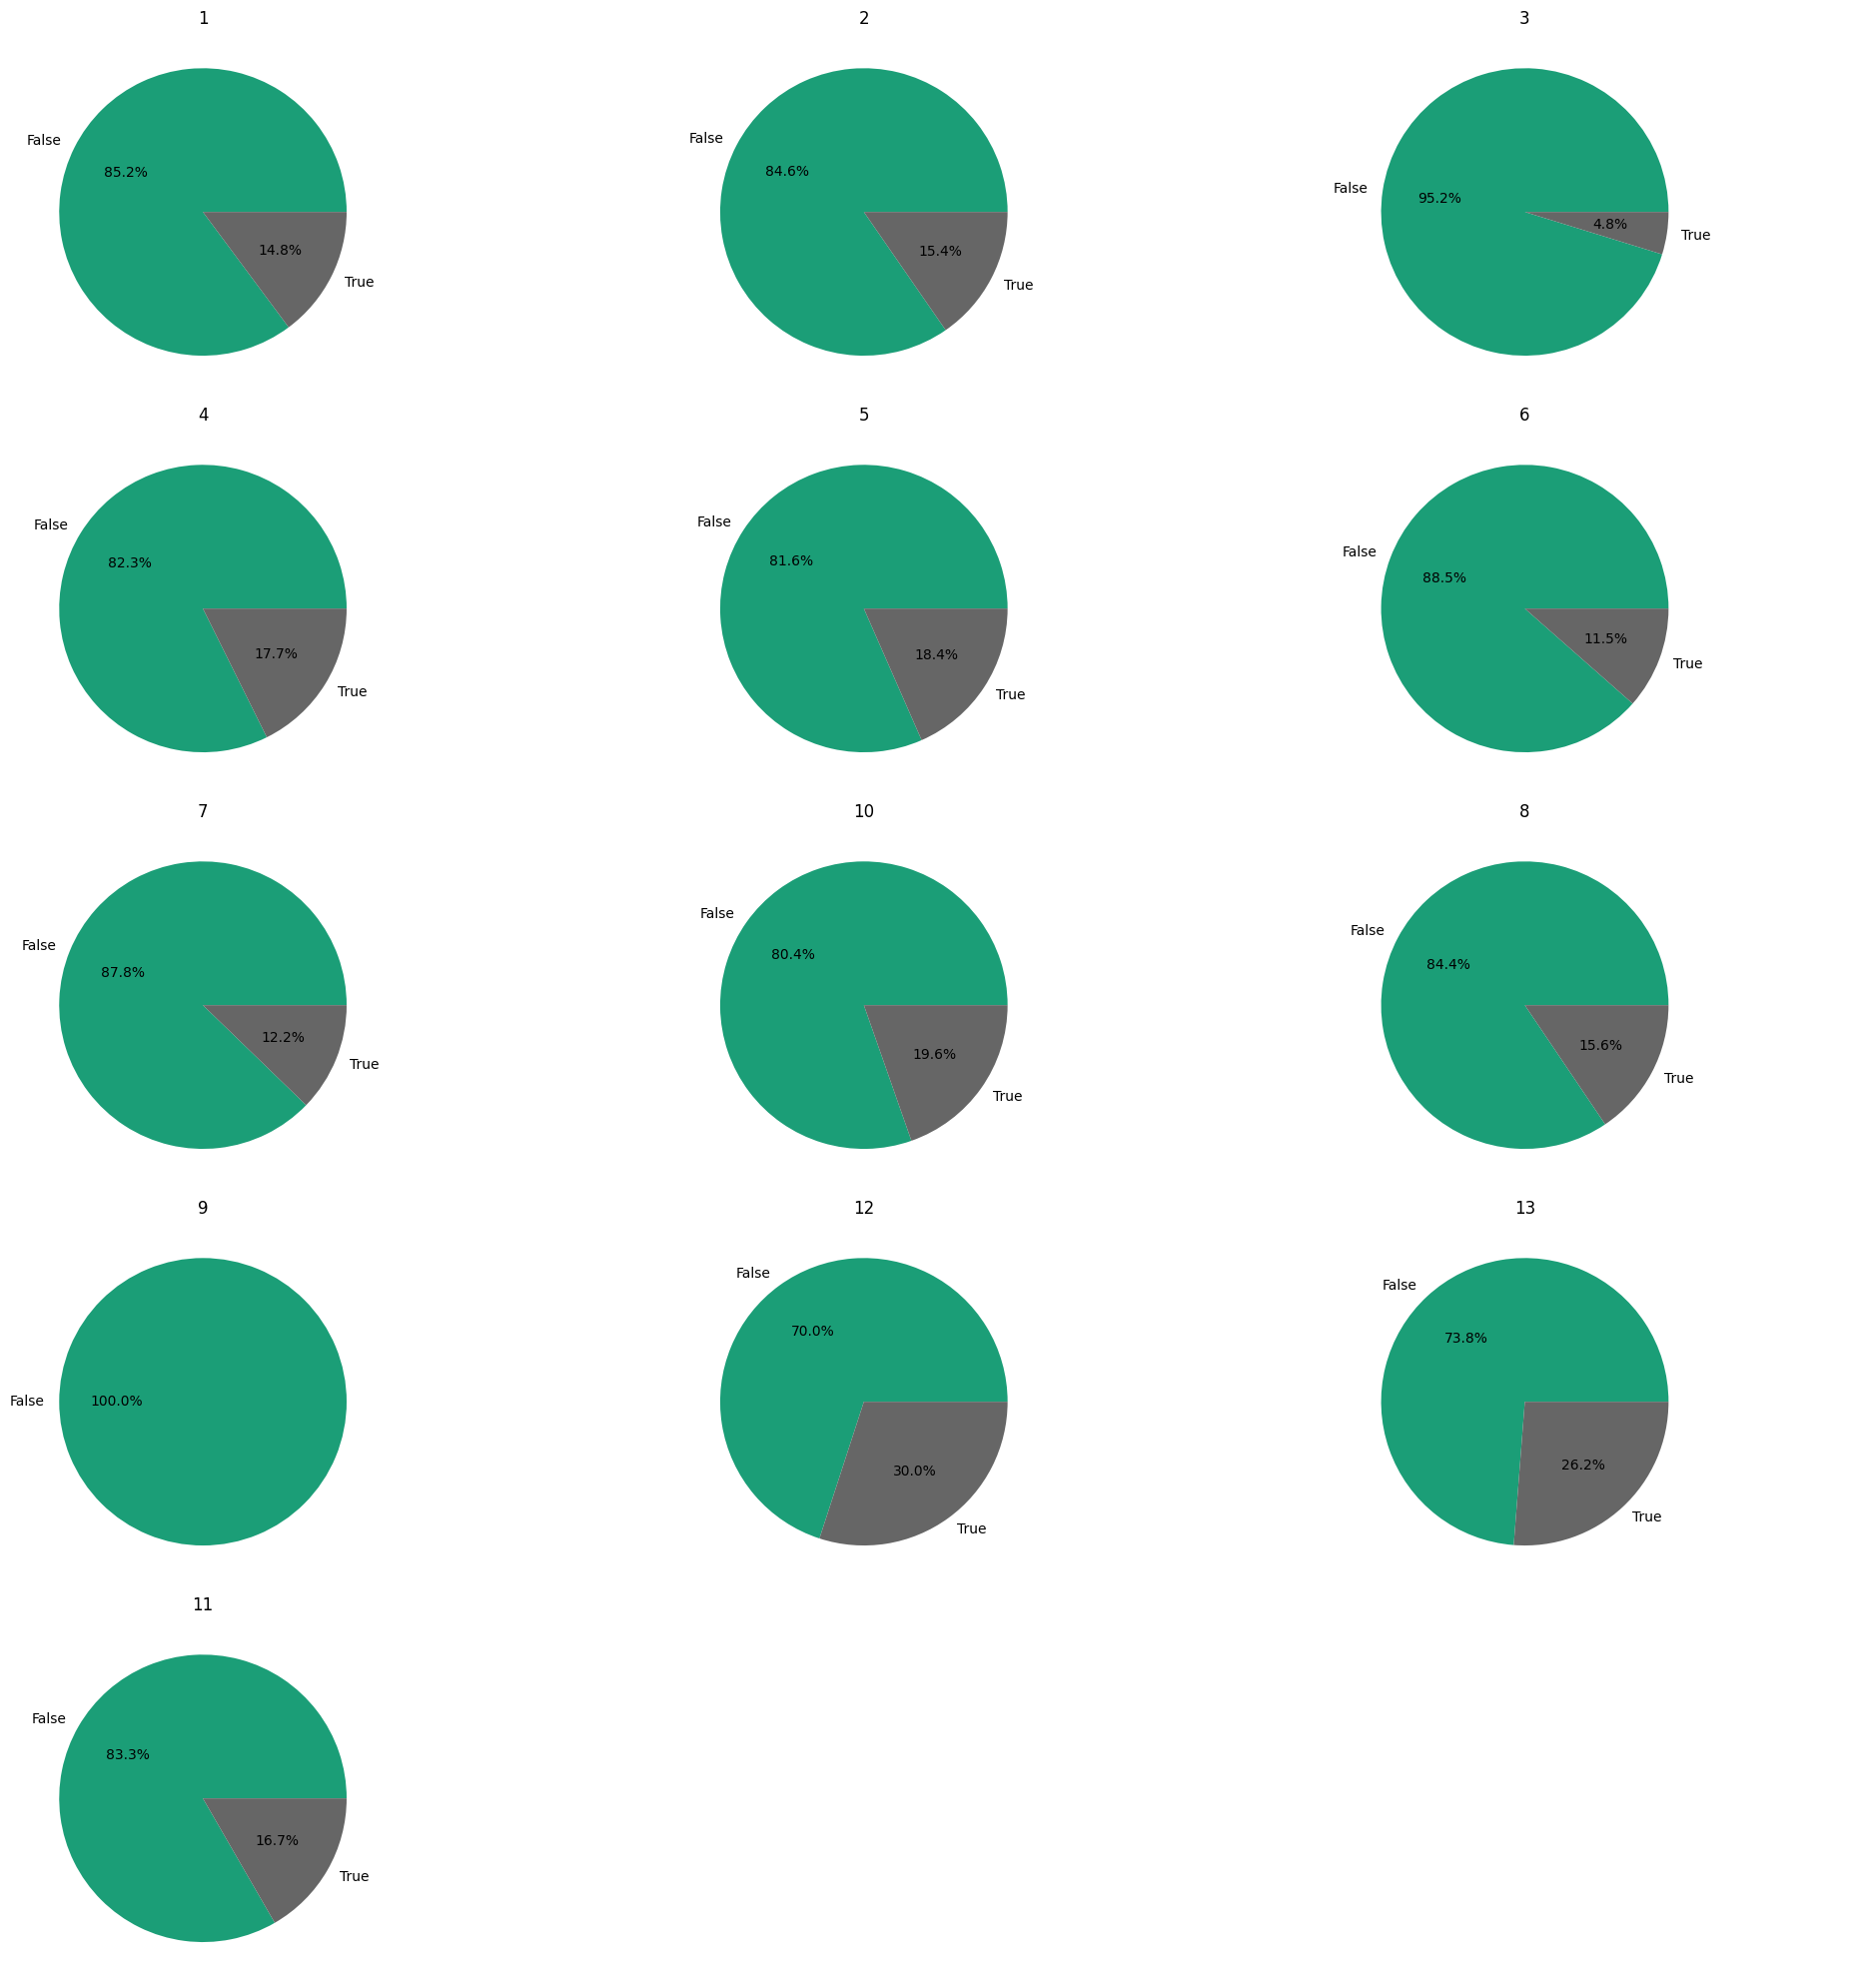

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


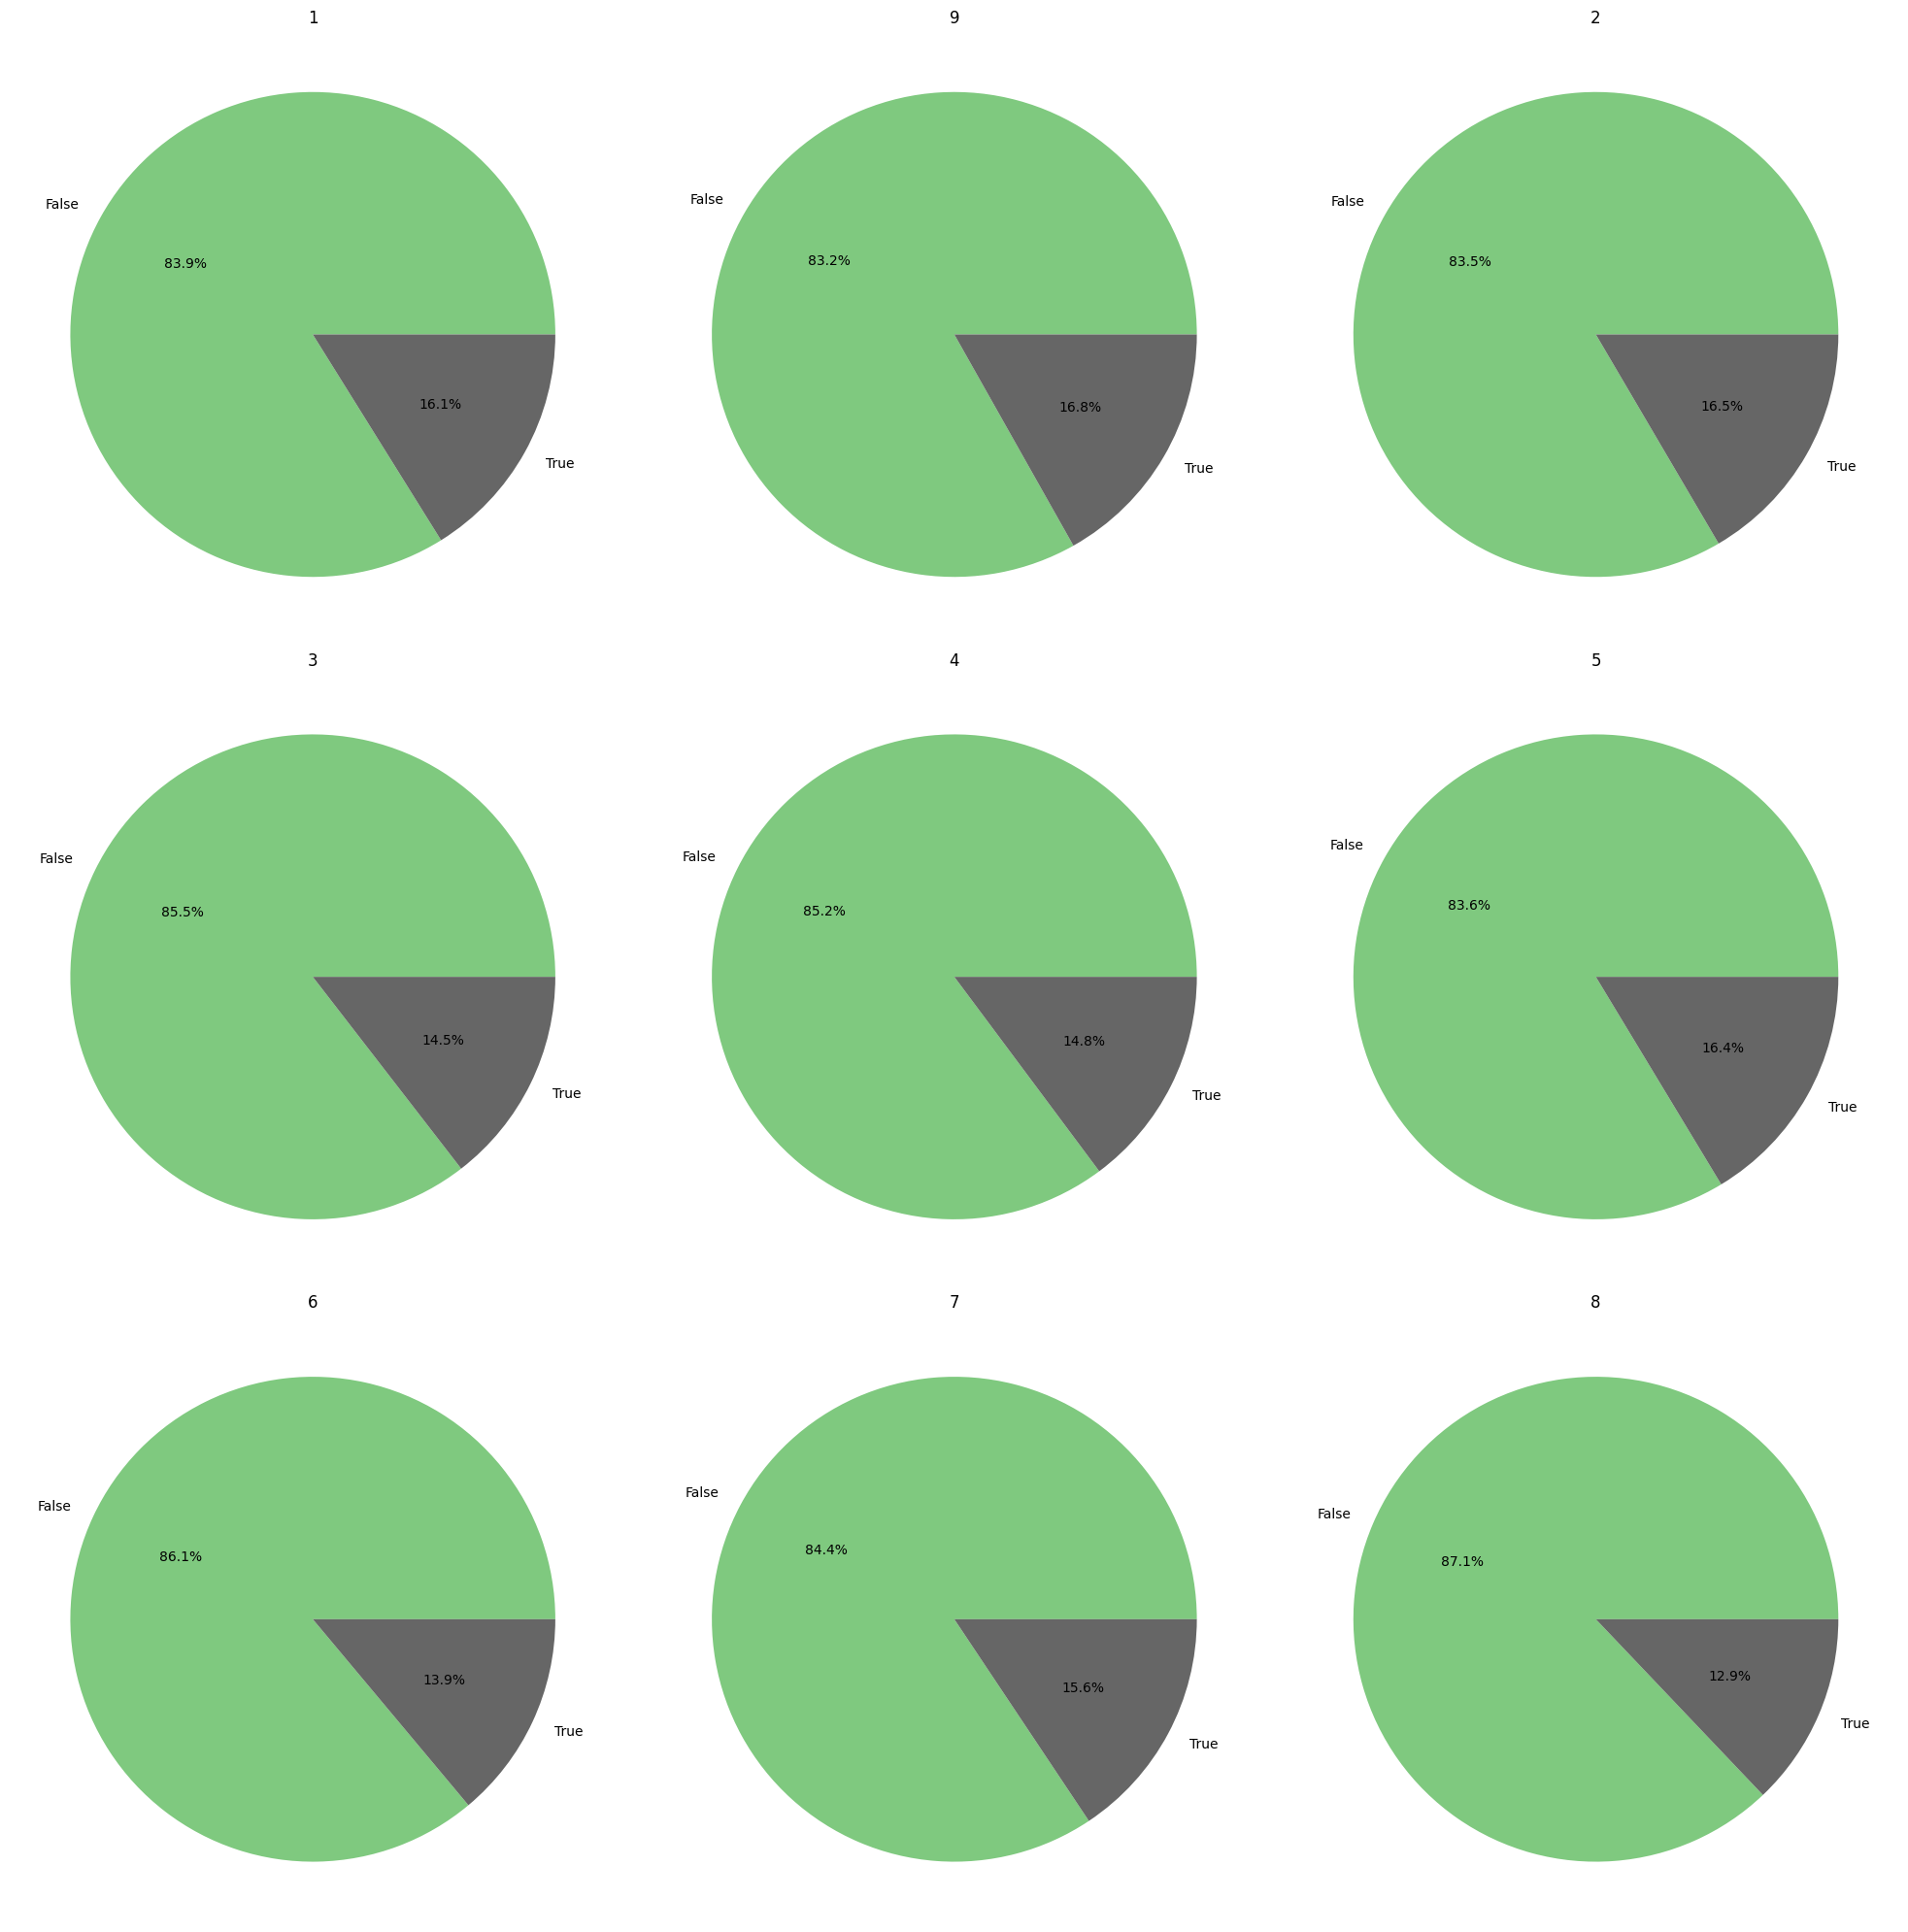

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


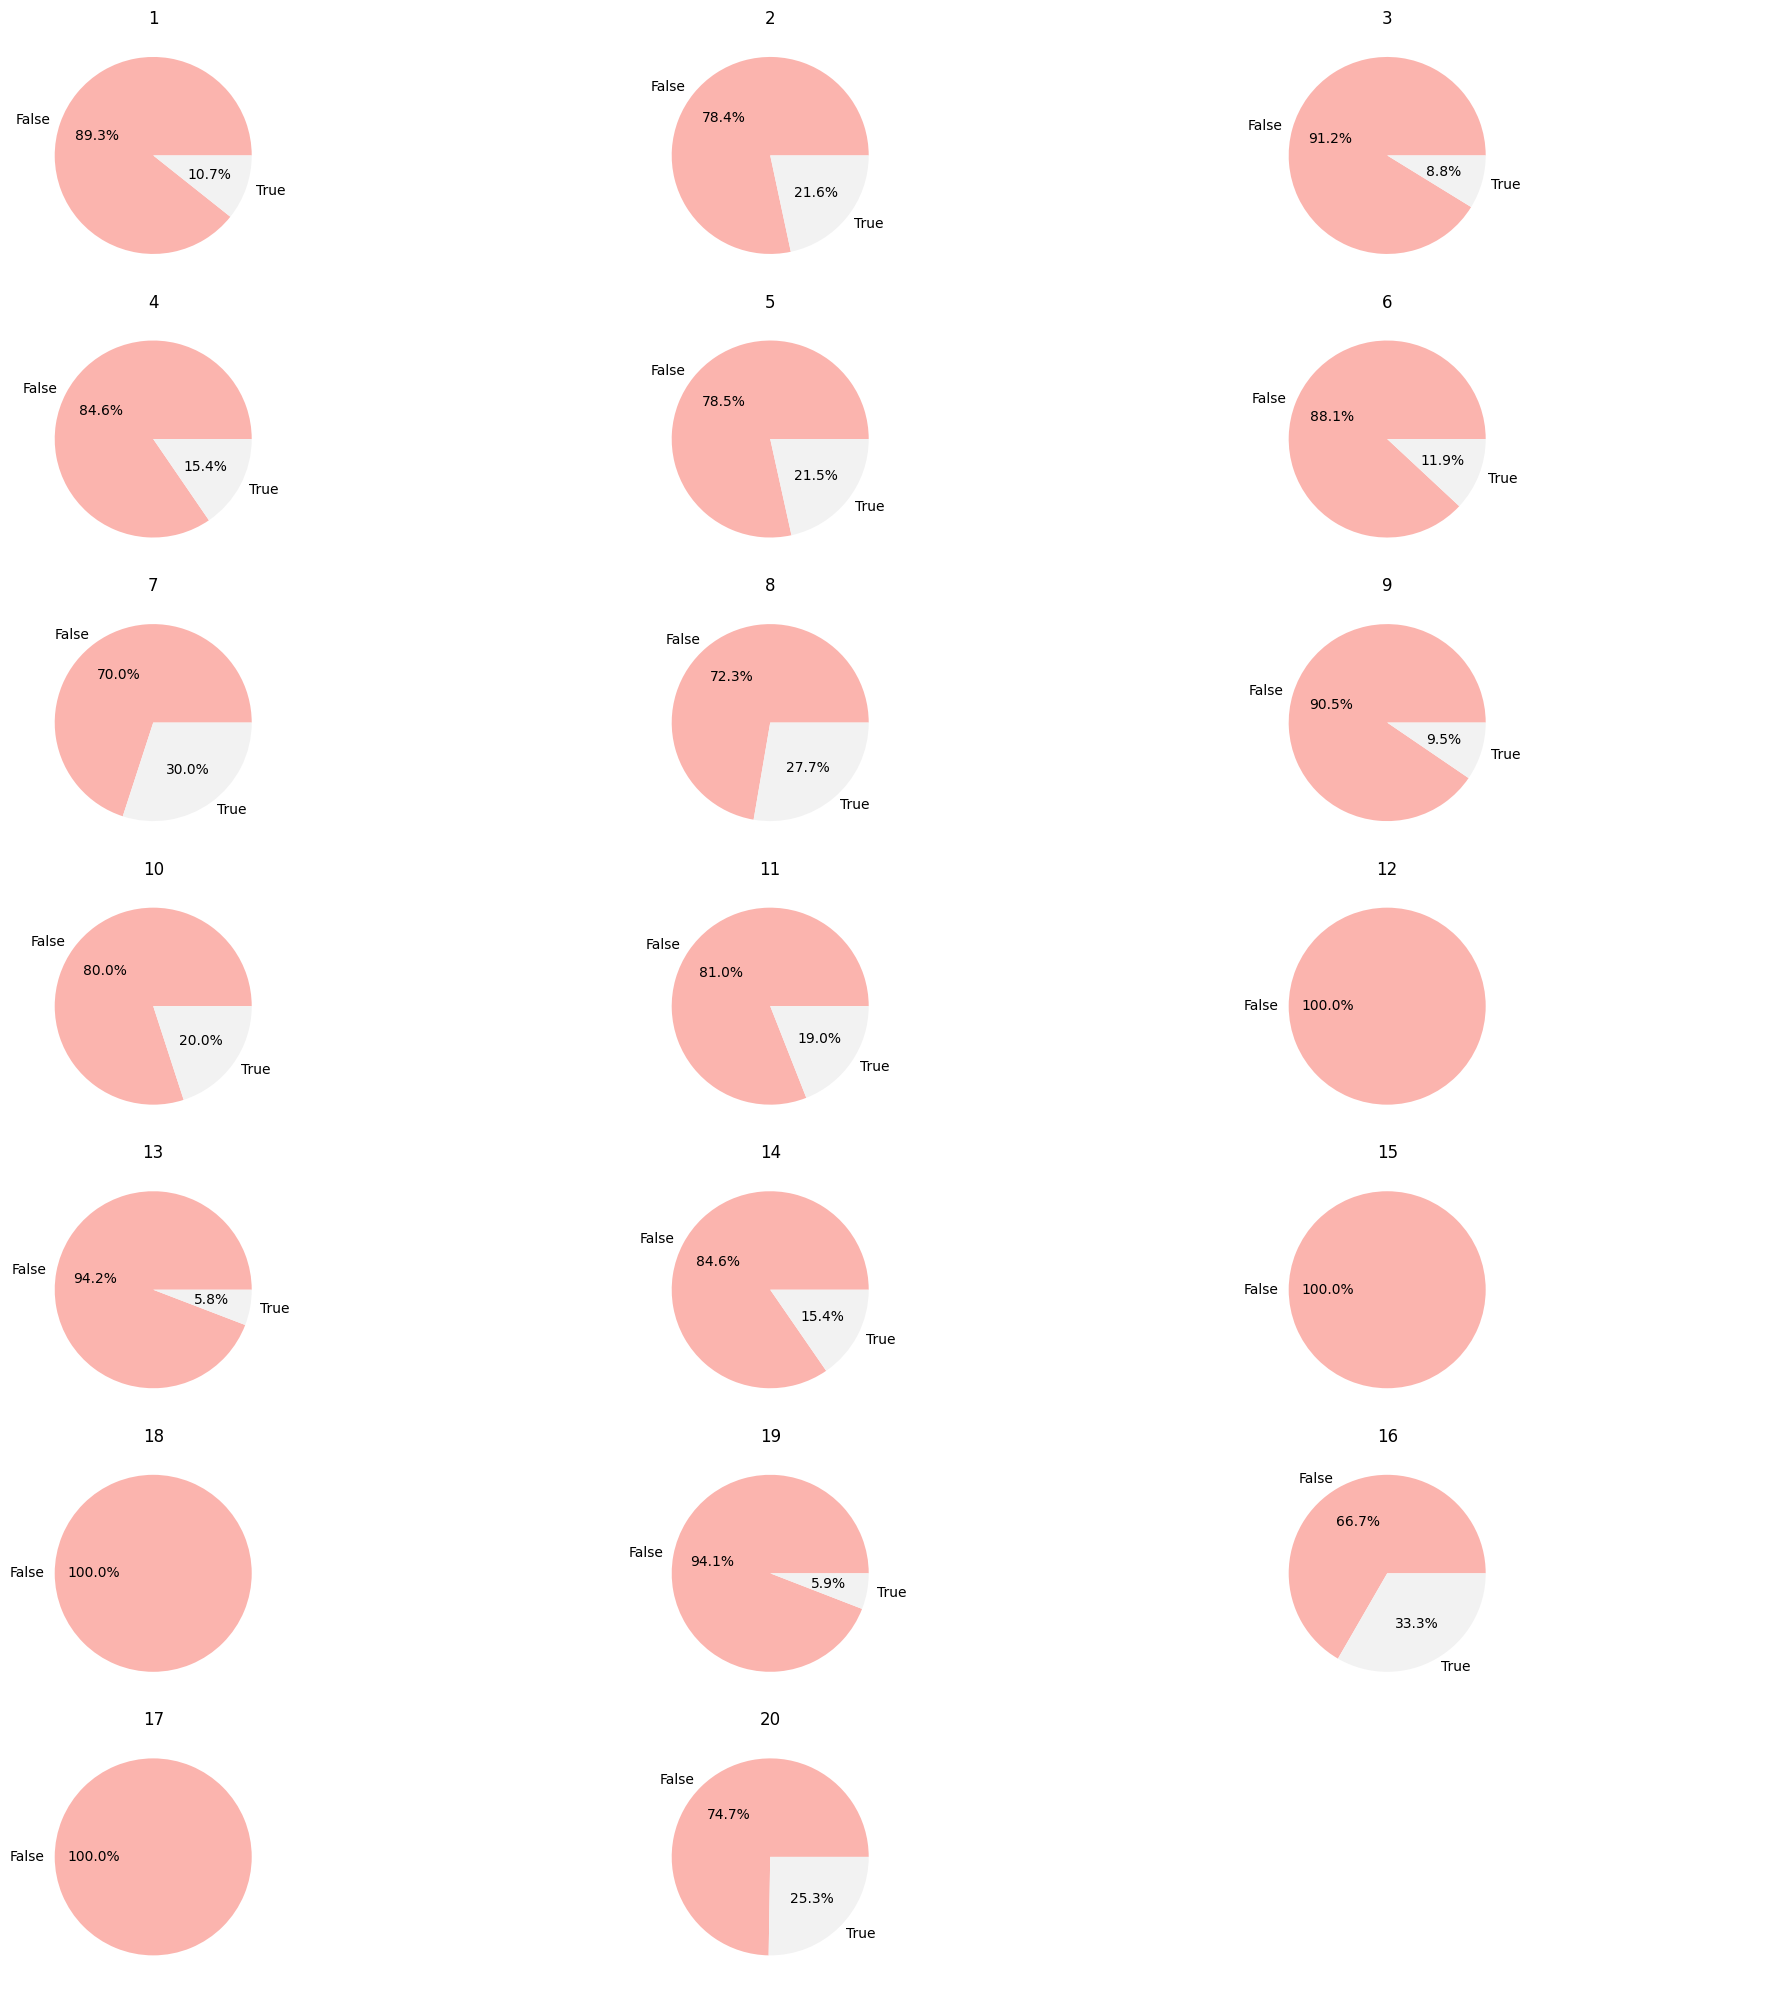

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


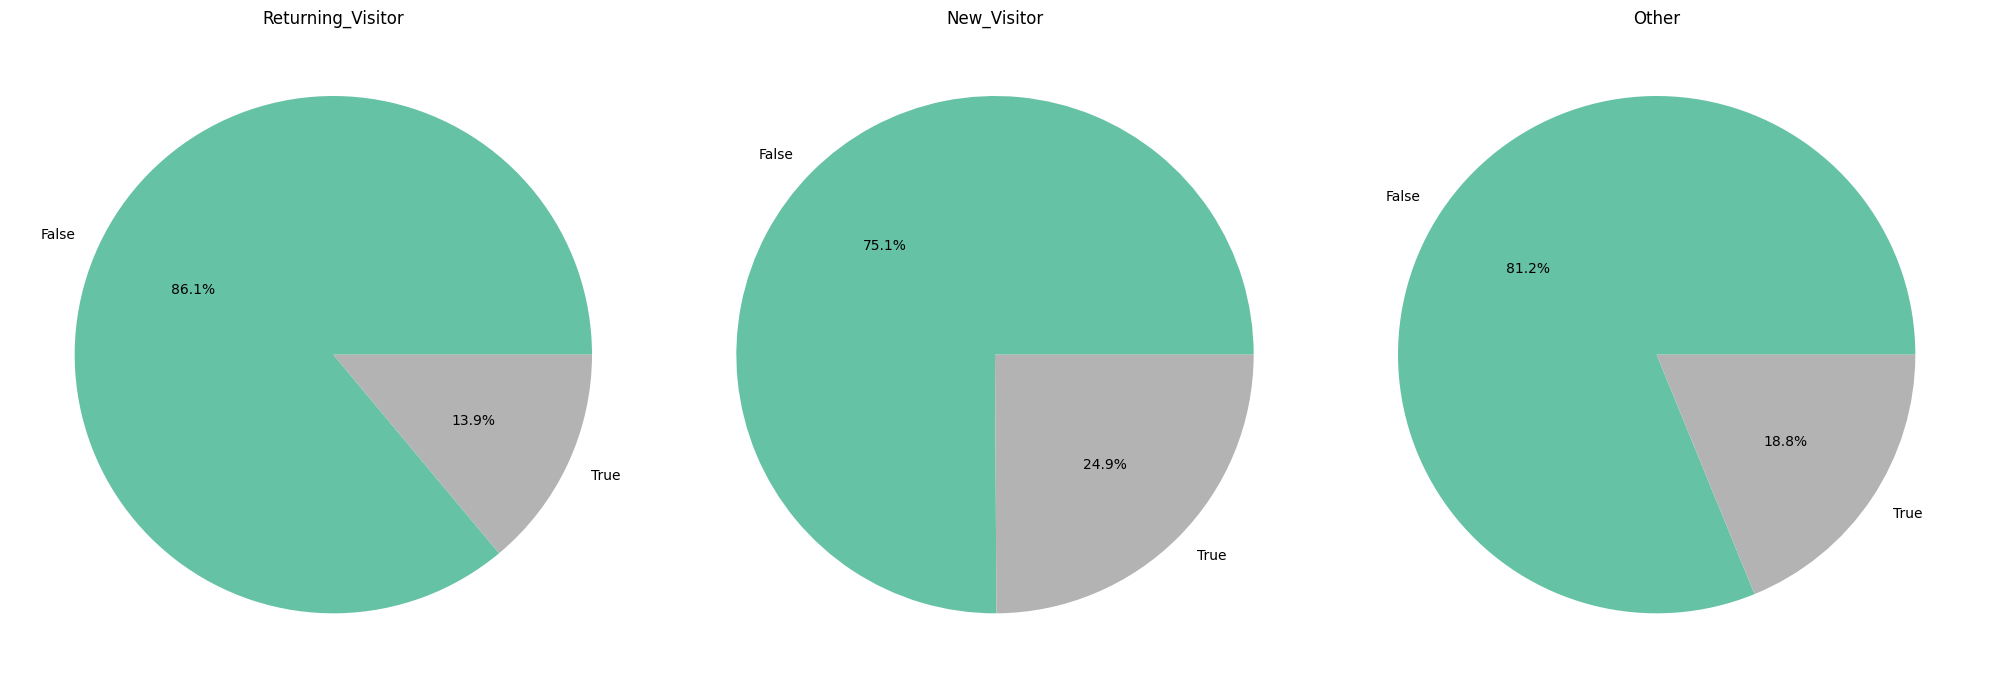

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


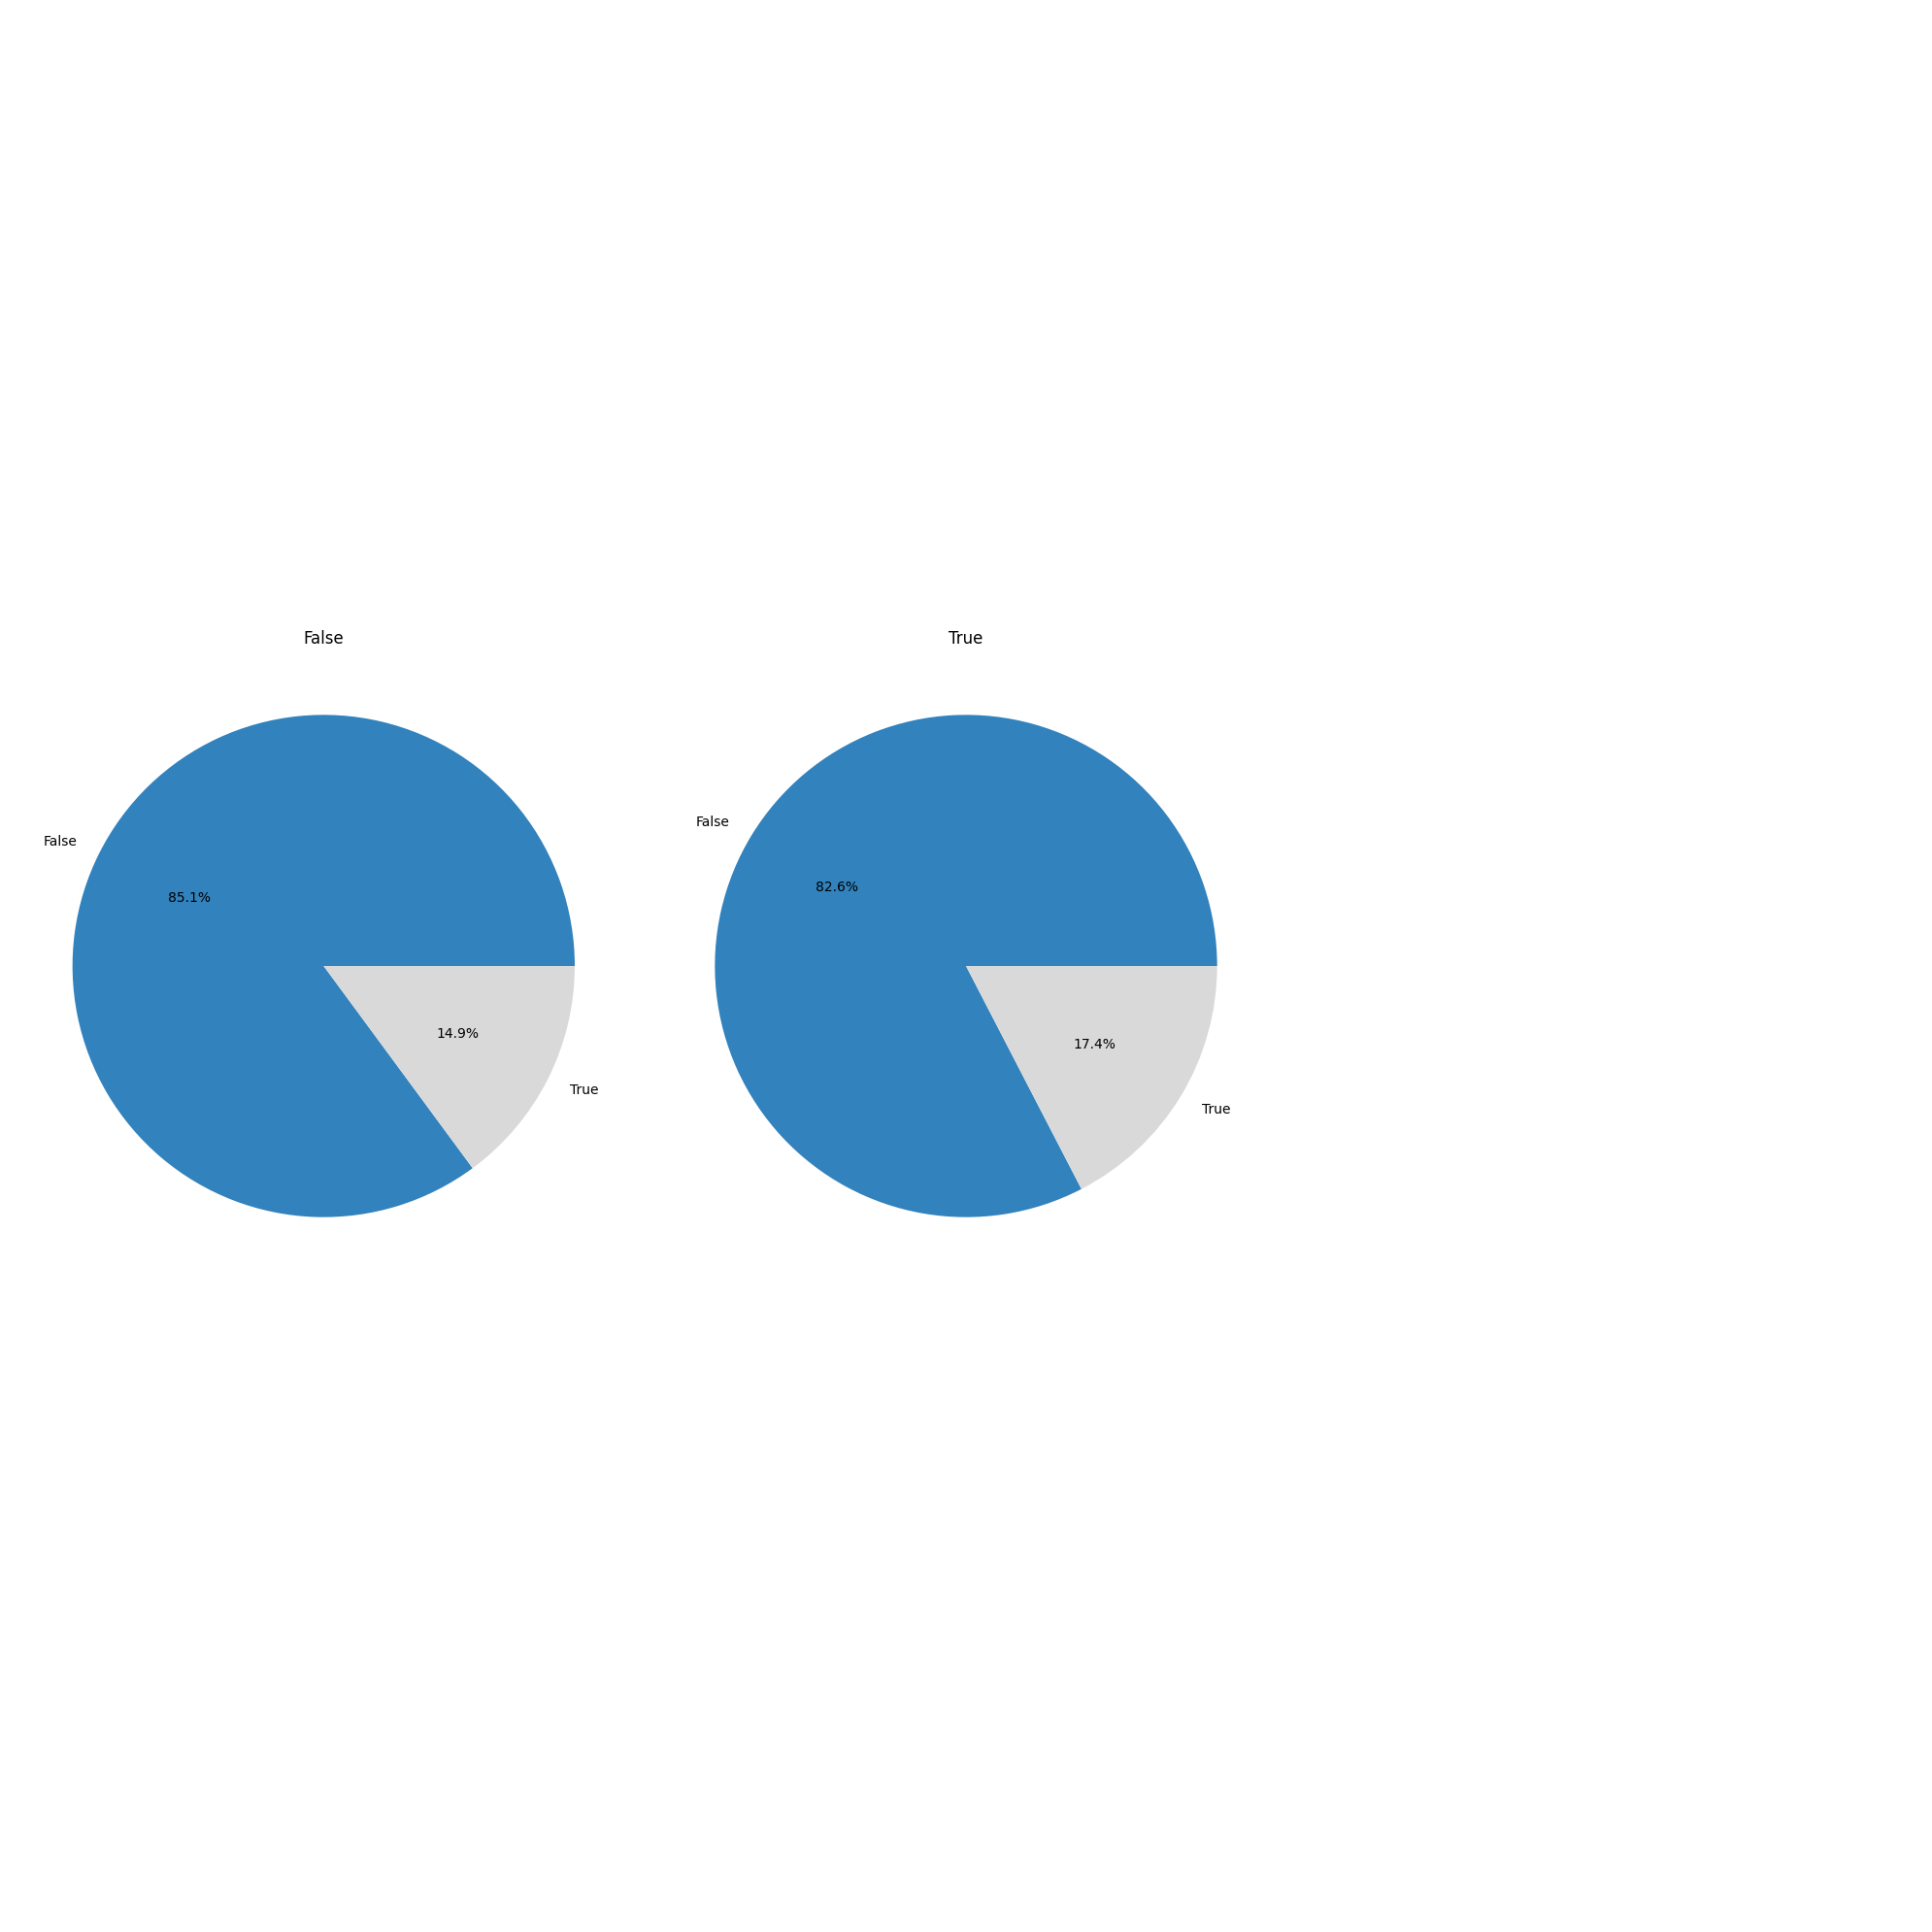

In [347]:
import numpy as np
import matplotlib.pyplot as plt

# List of 6 color maps that will circulate across different columns
color_maps = [
    plt.cm.Paired,
    plt.cm.Set3,
    plt.cm.tab10,
    plt.cm.Dark2,
    plt.cm.Accent,
    plt.cm.Pastel1,
    plt.cm.Set2,
    plt.cm.tab20c,
    plt.cm.tab20b,
    plt.cm.tab20,


]

def pie_chart(category_column, color_map_idx):
    cols = df[category_column].unique()

    ncols = 3
    nrows = int(np.ceil(len(cols) / ncols))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
    ax = ax.flatten()
    color_map = color_maps[color_map_idx % len(color_maps)]

    for idx, category in enumerate(cols):

        counts = df[df[category_column] == category]["Revenue"].value_counts()
        pie_colors = color_map(np.linspace(0, 1, len(counts)))
        counts.plot(kind="pie", autopct="%1.1f%%", ax=ax[idx], colors=pie_colors)
        ax[idx].set_title(f"{category}")
        ax[idx].set_ylabel("")  # Remove y-label for cleaner appearance


    for j in range(idx + 1, len(ax)):
        ax[j].axis('off')

    plt.tight_layout()
    plt.show()


cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


cat_cols = [col for col in cat_cols if col != 'Revenue']


for i, col in enumerate(cat_cols):
    print('-' * 200)
    display(HTML(f"<h2><b>Generating pie charts for: {col}</b></h1>"))


    pie_chart(col, i)


# **Boxplot**

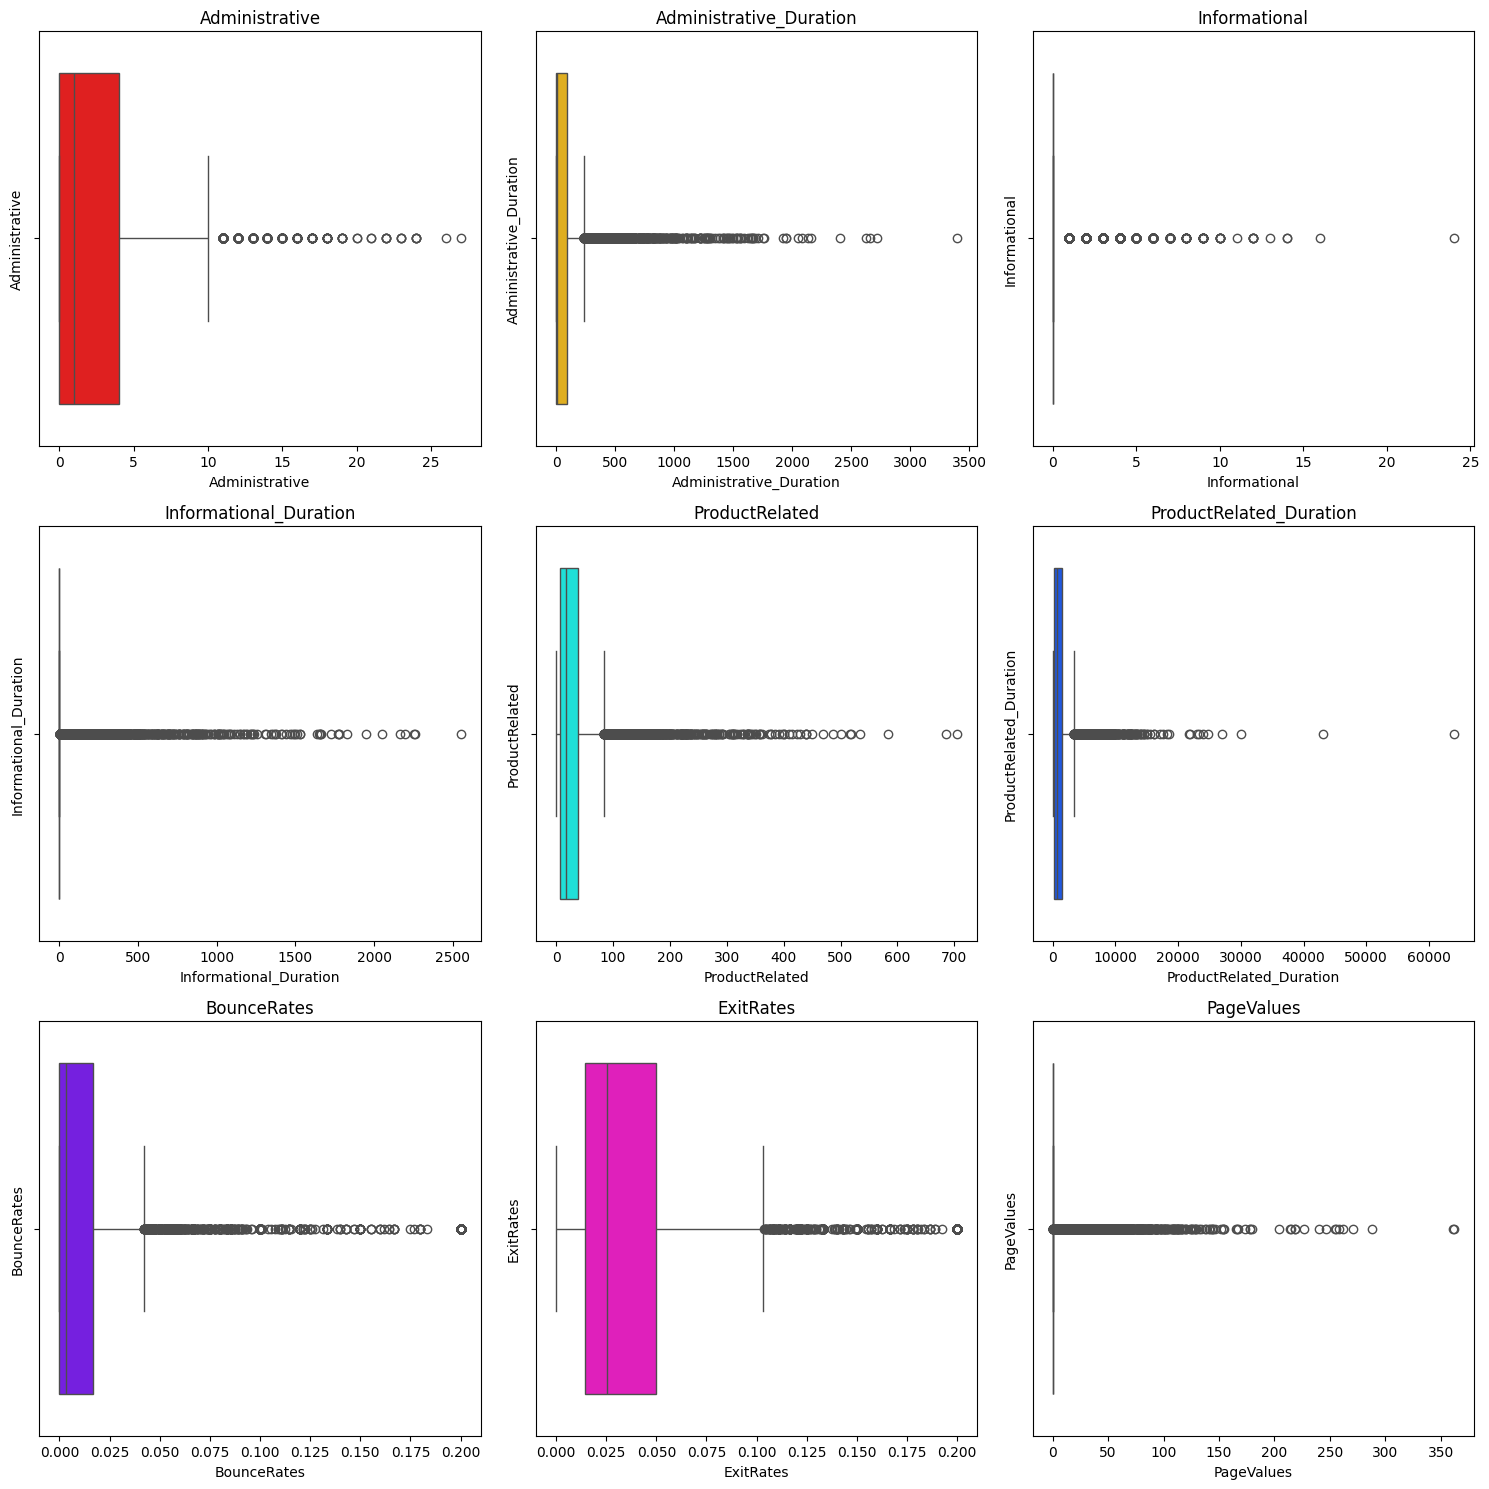

In [348]:
warnings.simplefilter(action='ignore', category=FutureWarning)

num_cols = df.select_dtypes(include=np.number).columns
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))
colors = plt.cm.hsv(np.linspace(0, 1, len(num_cols)))


fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
ax = ax.flatten()


for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=ax[idx], orient='h',color=colors[idx])
    ax[idx].set_title(f"{col}")
    ax[idx].set_ylabel(col)


for j in range(len(num_cols), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


## Number of outliers in each column

In [349]:
import numpy as np
import pandas as pd

def count_boxplot_outliers(df):
    outlier_counts = {}


    for col in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outlier_count = np.sum((df[col] < lower_bound) | (df[col] > upper_bound))
        outlier_counts[col] = outlier_count

    return outlier_counts

outlier_summary = count_boxplot_outliers(df)
print("Number of outliers in each column according to the box plot method:")
print(outlier_summary)


Number of outliers in each column according to the box plot method:
{'Administrative': 404, 'Administrative_Duration': 1172, 'Informational': 2631, 'Informational_Duration': 2405, 'ProductRelated': 987, 'ProductRelated_Duration': 961, 'BounceRates': 1551, 'ExitRates': 1099, 'PageValues': 2730}


# **Heatmap**

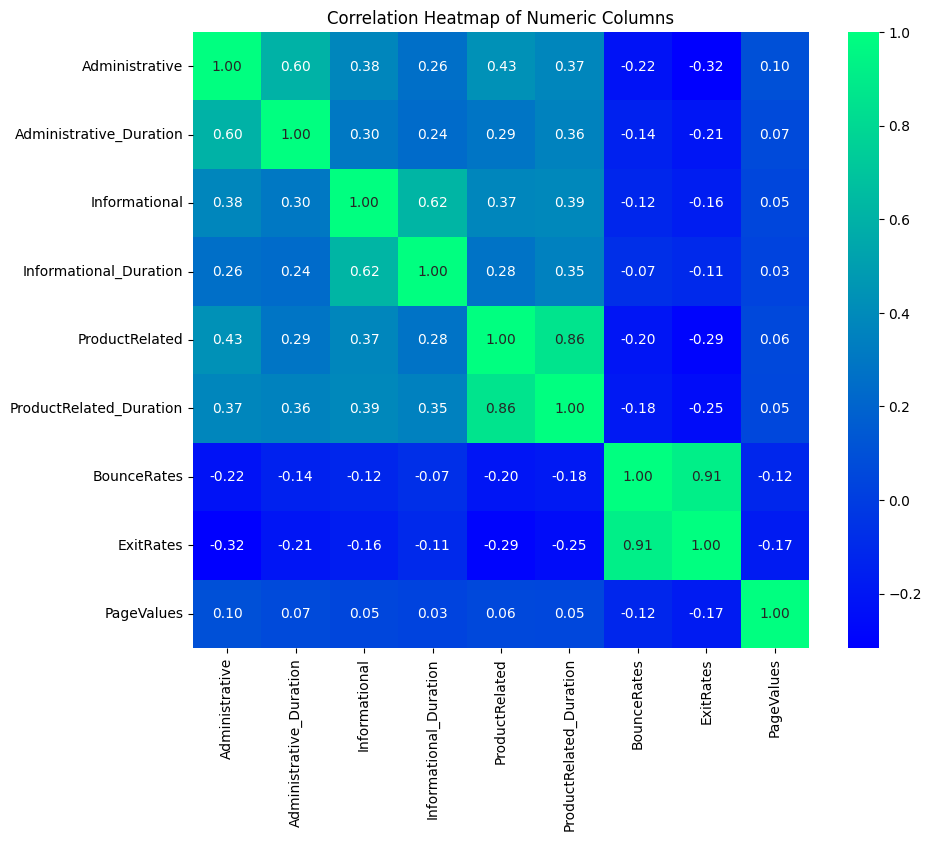

In [350]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="winter", fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# **Preforming chi-squared and ANOVA test for feature selection**

In [351]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

categorical_features = [col for col in df.columns if pd.api.types.is_string_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]

insignificant_columns = []


for feature in categorical_features:
  contingency_table = pd.crosstab(df[feature], df['Revenue'])
  chi2, p_value, _, _ = chi2_contingency(contingency_table)
  print(f"Chi-Squared test for {feature} vs FraudFound_P:")
  print(f"  Chi-squared statistic: {chi2}")
  print(f"  P-value: {p_value}")
  if p_value > 0.05:
    insignificant_columns.append(feature)

print("List of insignificant columns:")
print(insignificant_columns)


Chi-Squared test for SpecialDay vs FraudFound_P:
  Chi-squared statistic: 96.07690626757704
  P-value: 3.5432443403841987e-19
Chi-Squared test for Month vs FraudFound_P:
  Chi-squared statistic: 384.93476153599426
  P-value: 2.2387855164805443e-77
Chi-Squared test for OperatingSystems vs FraudFound_P:
  Chi-squared statistic: 75.02705620298462
  P-value: 1.4160941129614401e-13
Chi-Squared test for Browser vs FraudFound_P:
  Chi-squared statistic: 27.715299401381564
  P-value: 0.00608754317955108
Chi-Squared test for Region vs FraudFound_P:
  Chi-squared statistic: 9.252751430579844
  P-value: 0.3214249979076556
Chi-Squared test for TrafficType vs FraudFound_P:
  Chi-squared statistic: 373.1455646881486
  P-value: 1.652735258160153e-67
Chi-Squared test for VisitorType vs FraudFound_P:
  Chi-squared statistic: 135.2519228192047
  P-value: 4.269904152293867e-30
Chi-Squared test for Weekend vs FraudFound_P:
  Chi-squared statistic: 10.390978319534856
  P-value: 0.0012663251061221968
Chi-Sq

In [352]:
import pandas as pd
from scipy.stats import f_oneway


numerical_features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'Revenue']

insignificant_columns_anova = []


for feature in numerical_features:
  groups = [df[feature][df['Revenue'] == i] for i in df['Revenue'].unique()]
  f_statistic, p_value = f_oneway(*groups)
  print(f"ANOVA for {feature} vs Revenue:")
  print(f"  F-statistic: {f_statistic}")
  print(f"  P-value: {p_value}")
  if p_value > 0.05:
    insignificant_columns_anova.append(feature)

print("List of insignificant columns:")
print(insignificant_columns_anova)


ANOVA for Administrative vs Revenue:
  F-statistic: 242.58666669397755
  P-value: 3.519759837717179e-54
ANOVA for Administrative_Duration vs Revenue:
  F-statistic: 108.9285148363418
  P-value: 2.1465136347090738e-25
ANOVA for Informational vs Revenue:
  F-statistic: 112.75184304201588
  P-value: 3.1740343112109894e-26
ANOVA for Informational_Duration vs Revenue:
  F-statistic: 61.306613117373004
  P-value: 5.2828708606337516e-15
ANOVA for ProductRelated vs Revenue:
  F-statistic: 317.8443503021459
  P-value: 3.2411873288679093e-70
ANOVA for ProductRelated_Duration vs Revenue:
  F-statistic: 293.0276033848532
  P-value: 6.11533825336717e-65
ANOVA for BounceRates vs Revenue:
  F-statistic: 286.3756737293372
  P-value: 1.5941975384898047e-63
ANOVA for ExitRates vs Revenue:
  F-statistic: 552.2865021045085
  P-value: 1.662653625046055e-119
ANOVA for PageValues vs Revenue:
  F-statistic: 3949.2629599637944
  P-value: 0.0
List of insignificant columns:
[]


In [353]:
df.drop(insignificant_columns,axis=1,inplace=True)

# **Evaluating CatBoost Performance Before Performing Feature Engineering**

In [354]:
!pip install -q catboost

Accuracy: 0.894566098945661
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.74      0.57      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466

Confusion Matrix:
[[1971   84]
 [ 176  235]]


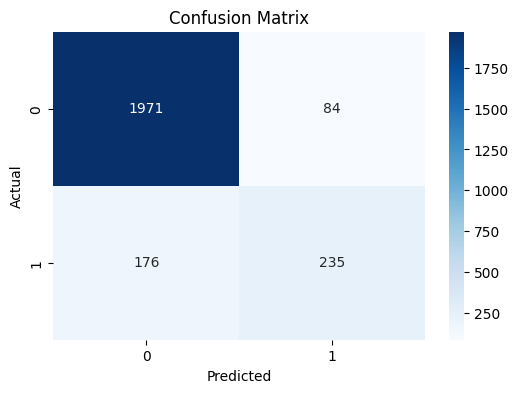

In [355]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


X = df.drop('Revenue', axis=1)
y = df['Revenue']


le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
model.fit(X_train, y_train, verbose=False)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Feature Engineering**

# **Handeling outliers**

In [356]:
# def outlier_handler(df, col):

#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     upper_bound = Q3 + 1.5 * IQR
#     print(f"Variance before removing outliers in {col}: {df[col].var()}")
#     df[col] = df[col].where(df[col] <= upper_bound, other=upper_bound)  # Replace outliers with the upper bound


#     print(f"Variance after removing outliers in {col}: {df[col].var()}")
#     return df


# for i in num_cols:
#     df = outlier_handler(df, i)



In [357]:
# import numpy as np
# import pandas as pd
# from scipy import stats

# def outlier_handler(df, col, threshold=3):

#     if col not in df.columns:
#         print(f"Column '{col}' not found in DataFrame.")


#     z_scores = np.abs(stats.zscore(df[col]))
#     print(f"Variance before removing outliers in '{col}': {df[col].var()}")
#     df_cleaned = df[z_scores < threshold]
#     print(f"Variance after removing outliers in '{col}': {df_cleaned[col].var()}")
#     return df_cleaned


# num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# for col in num_cols:
#     print(f"Processing column: '{col}'")
#     df = outlier_handler(df, col)


#Removing or handling outliers negatively impacts the model's performance in this use case, so we choose to keep them as is.

In [358]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# **Using column transformer for feature transformation**: scaling, encoding.

In [359]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import pandas as pd


num_col = [i for i in df.columns if df[i].dtype != 'object' and i != 'Revenue']
cat_col = [i for i in df.columns if df[i].dtype == 'object' and i != 'Revenue']


target_column = 'Revenue'


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_col)
    ],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


X_transformed = pipeline.fit_transform(df.drop(columns=[target_column]))


transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(num_col + cat_col)

transformed_df = pd.DataFrame(X_transformed, columns=transformed_feature_names)

label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

final_df = pd.concat([transformed_df, df[[target_column]]], axis=1)

In [360]:
df = final_df

# **Training and evaluating XGboost, random forest and LogisticRegression without SMOTE**

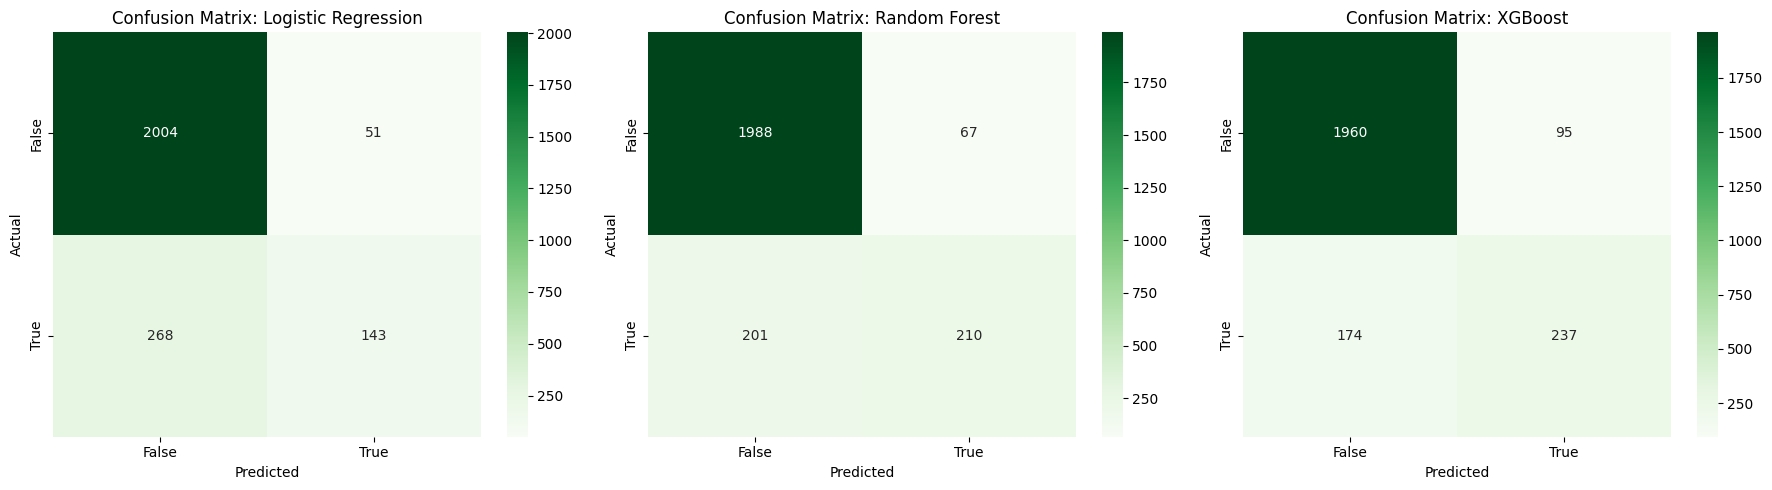

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466


Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.51      0.61       411

    accuracy                           0.89      2466
   macro avg       0.83      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466


XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.71      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.88    

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)


def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
                xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

fig, axs = plt.subplots(1, 3, figsize=(18, 5))


plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression", axs[0])
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest", axs[1])
plot_confusion_matrix(y_test, xgb_y_pred, "XGBoost", axs[2])


plt.tight_layout()
plt.show()


print("Logistic Regression:")
print(classification_report(y_test, lr_y_pred))

print("\nRandom Forest:")
print(classification_report(y_test, rf_y_pred))

print("\nXGBoost:")
print(classification_report(y_test, xgb_y_pred))


# **XGboost, random forest and LogisticRegression with SMOTE**

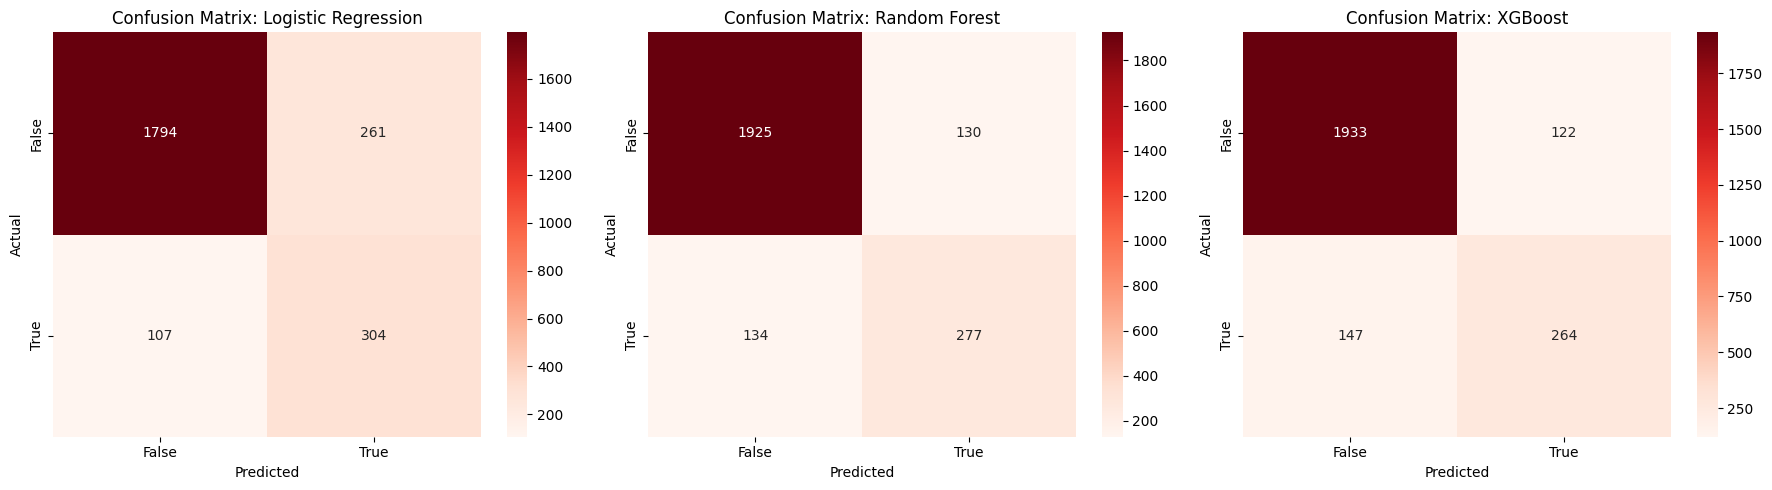

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      2055
           1       0.54      0.74      0.62       411

    accuracy                           0.85      2466
   macro avg       0.74      0.81      0.76      2466
weighted avg       0.88      0.85      0.86      2466


Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2055
           1       0.68      0.67      0.68       411

    accuracy                           0.89      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.89      0.89      0.89      2466


XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2055
           1       0.68      0.64      0.66       411

    accuracy                           0.89      2466
   macro avg       0.81      0.79      0.80      2466
weighted avg       0.89    

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred = lr_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_y_pred = xgb_model.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax,
                xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression", axs[0])
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest", axs[1])
plot_confusion_matrix(y_test, xgb_y_pred, "XGBoost", axs[2])

plt.tight_layout()
plt.show()


print("Logistic Regression:")
print(classification_report(y_test, lr_y_pred))

print("\nRandom Forest:")
print(classification_report(y_test, rf_y_pred))

print("\nXGBoost:")
print(classification_report(y_test, xgb_y_pred))


# **Training and evaluating BalancedRandomForestClassifier, EasyEnsembleClassifier**

--- Balanced Random Forest ---
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2084
           1       0.51      0.85      0.64       382

    accuracy                           0.85      2466
   macro avg       0.74      0.85      0.77      2466
weighted avg       0.90      0.85      0.86      2466

------------------
--- Easy Ensemble ---
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2084
           1       0.54      0.79      0.64       382

    accuracy                           0.86      2466
   macro avg       0.75      0.83      0.78      2466
weighted avg       0.89      0.86      0.87      2466

------------------


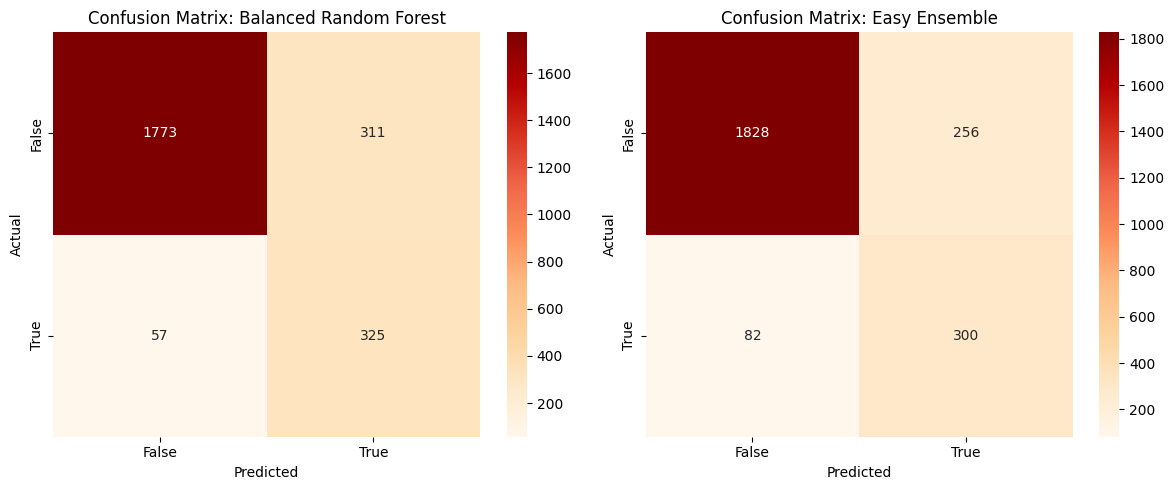

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


target_column = 'Revenue'


X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', ax=ax,
                xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print("------------------")

    return y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

y_pred_rf = train_and_evaluate(BalancedRandomForestClassifier(random_state=42), "Balanced Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Balanced Random Forest", axes[0])

y_pred_easy = train_and_evaluate(EasyEnsembleClassifier(random_state=42, n_estimators=100), "Easy Ensemble")
plot_confusion_matrix(y_test, y_pred_easy, "Easy Ensemble", axes[1])

plt.tight_layout()
plt.show()
